# Data Analysis Final Project
**Due Date:** January 29, 2026, 23:59  

**Group:** Cuircuit Synergy  

**Created By:** Jeremia Baumgartner, Lorenz Buchinger, Tim Zwölfer  

---
**Table of contents**
1. [A. Data Preprocessing and Data Quality (70 points)](#a-data-preprocessing-and-data-quality-70-points)
2. [B. Visualization and Exploratory Analysis (55 points)](#b-visualization-and-exploratory-analysis-55-points)
3. [C. Probability and Event Analysis (45 points)](#c-probability-and-event-analysis-45-points)
4. [D. Statistical Theory Applications (45 points)](#d-statistical-theory-applications-45-points)
5. [E. Regression and Predictive Modeling (45 points)](#e-regression-and-predictive-modeling-45-points)
6. [F. Dimensionality Reduction and Statistical Tests (40 points)](#f-dimensionality-reduction-and-statistical-tests-40-points)



---
**Initial Setup**

In [202]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [6, 4],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 8,
    'axes.titlesize': 10,
    'font.size': 6,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

---
**Load Data**

In [203]:
df_csv_data = pd.read_csv('traffic_accidents.csv')
df_csv_data_raw = df_csv_data # Keep a raw copy

---
## A. Data Preprocessing and Data Quality (70 points)
---
**Assigned to Lorenz**
- Dataset overview (dimensions, columns, types, time range, sampling rate, missingness
summary) (10 points)
- Basic statistical analysis using pandas (descriptives, grouped stats, quantiles) (10 points)
- Original data quality analysis with visualization (missingness patterns, outliers, dupli-
cates, timestamp gaps, inconsistent units) (20 points)
- Data preprocessing pipeline (cleaning steps, handling missing data, outliers strategy, re-
sampling or alignment if needed, feature engineering basics) (20 points)
- Preprocessed vs original comparison (before/after visuals plus commentary on what changed
and why) (10 points)

### Dataset Overview  
**Dimensions**

In [204]:
print("The dataset contains", df_csv_data.shape[0], "rows and", df_csv_data.shape[1], "columns.")

The dataset contains 209306 rows and 24 columns.


**Columns and types**

In [205]:
schema_table = (
    df_csv_data.dtypes
    .reset_index()
    .rename(columns={"index": "column", 0: "dtype"})
)

schema_table

column    dtype
0                      crash_date   object
1          traffic_control_device   object
2               weather_condition   object
3              lighting_condition   object
4                first_crash_type   object
5                 trafficway_type   object
6                       alignment   object
7            roadway_surface_cond   object
8                     road_defect   object
9                      crash_type   object
10         intersection_related_i   object
11                         damage   object
12        prim_contributory_cause   object
13                      num_units    int64
14             most_severe_injury   object
15                 injuries_total  float64
16                 injuries_fatal  float64
17        injuries_incapacitating  float64
18    injuries_non_incapacitating  float64
19  injuries_reported_not_evident  float64
20         injuries_no_indication  float64
21                     crash_hour    int64
22              crash_day_of_week    int64
23                    crash_month    int64

**Time Range**

In [206]:
first_date = df_csv_data["crash_date"].min()
last_date = df_csv_data["crash_date"].max()

print("First entry date:", first_date)
print("Last entry date:", last_date)

First entry date: 01/01/2016 01:03:00 AM
Last entry date: 12/31/2024 12:55:00 PM


**Sampling Rate**  
There is no constant sampling rate since car accidents don't happen in fixed intervals.

**Missingness Summary**  
Missing values in the dataset are encoded using the string 'UNKNOWN' rather than null values.

In [207]:
num_values_total = df_csv_data_raw.shape[0] * df_csv_data_raw.shape[1]
print("Total number of values in the dataset:", num_values_total)

unknown_total = (df_csv_data_raw == "UNKNOWN").sum().sum()
print("Total UNKNOWN values:", unknown_total)

unknown_percentage = (unknown_total / num_values_total) * 100
print(f"Percentage of UNKNOWN values: {unknown_percentage:.2f}%")

Total number of values in the dataset: 5023344
Total UNKNOWN values: 63320
Percentage of UNKNOWN values: 1.26%


In [208]:
missing_summary = pd.DataFrame({
    "missing_count": (df_csv_data_raw == "UNKNOWN").sum(),
    "missing_percent": ((df_csv_data_raw == "UNKNOWN").mean() * 100).round(2)
}).sort_values(by="missing_percent", ascending=False)

missing_summary

missing_count  missing_percent
road_defect                            34426            16.45
roadway_surface_cond                   12509             5.98
weather_condition                       6534             3.12
traffic_control_device                  4455             2.13
lighting_condition                      4336             2.07
trafficway_type                         1060             0.51
crash_date                                 0             0.00
injuries_total                             0             0.00
crash_day_of_week                          0             0.00
crash_hour                                 0             0.00
injuries_no_indication                     0             0.00
injuries_reported_not_evident              0             0.00
injuries_non_incapacitating                0             0.00
injuries_incapacitating                    0             0.00
injuries_fatal                             0             0.00
prim_contributory_cause                    0             0.00
most_severe_injury                         0             0.00
num_units                                  0             0.00
damage                                     0             0.00
intersection_related_i                     0             0.00
crash_type                                 0             0.00
alignment                                  0             0.00
first_crash_type                           0             0.00
crash_month                                0             0.00

### Basic Statistical Analysis Using Pandas (descriptives, grouped stats, quantiles)

**Descriptive Analysis**  
Qantiles, min., max., mean value and standard deviation of all columns.

In [247]:
df_csv_data = df_csv_data.replace("UNKNOWN", np.nan)
df_csv_data.describe()

num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000                  209306.000000   
mean                      0.221241                       0.121516   
std                       0.614960                       0.450865   
min                       0.000000                       0.000000   
25%                       0.000000                       0.000000   
50%                       0.000000                       0.000000   
75%                       0.000000                       0.000000   
max                      21.000000                      15.000000   

       injuries_no_indication     crash_hour  crash_day_of_week    crash_month  
count           209306.000000  209306.000000      209306.000000  209306.000000  
mean                 2.244002      13.373047           4.144024       6.771822  
std                  1.241175       5.603830           1.966864       3.427593  
min                  0.000000       0.000000           1.000000       1.000000  
25%                  2.000000       9.000000           2.000000       4.000000  
50%                  2.000000      14.000000           4.000000       7.000000  
75%                  3.000000      17.000000           6.000000      10.000000  
max                 49.000000      23.000000           7.000000      12.000000

In [210]:
quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
quantiles

C:\Users\conta\AppData\Local\Temp\ipykernel_17680\4224539621.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = df_csv_data.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])


num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
0.01        1.0             0.0             0.0                      0.0   
0.05        2.0             0.0             0.0                      0.0   
0.25        2.0             0.0             0.0                      0.0   
0.50        2.0             0.0             0.0                      0.0   
0.75        2.0             1.0             0.0                      0.0   
0.95        3.0             2.0             0.0                      0.0   
0.99        4.0             4.0             0.0                      1.0   

      injuries_non_incapacitating  injuries_reported_not_evident  \
0.01                          0.0                            0.0   
0.05                          0.0                            0.0   
0.25                          0.0                            0.0   
0.50                          0.0                            0.0   
0.75                          0.0                            0.0   
0.95                          1.0                            1.0   
0.99                          3.0                            2.0   

      injuries_no_indication  crash_hour  crash_day_of_week  crash_month  
0.01                     0.0         0.0                1.0          1.0  
0.05                     1.0         2.0                1.0          1.0  
0.25                     2.0         9.0                2.0          4.0  
0.50                     2.0        14.0                4.0          7.0  
0.75                     3.0        17.0                6.0         10.0  
0.95                     4.0        22.0                7.0         12.0  
0.99                     6.0        23.0                7.0         12.0

**Grouped Stats**

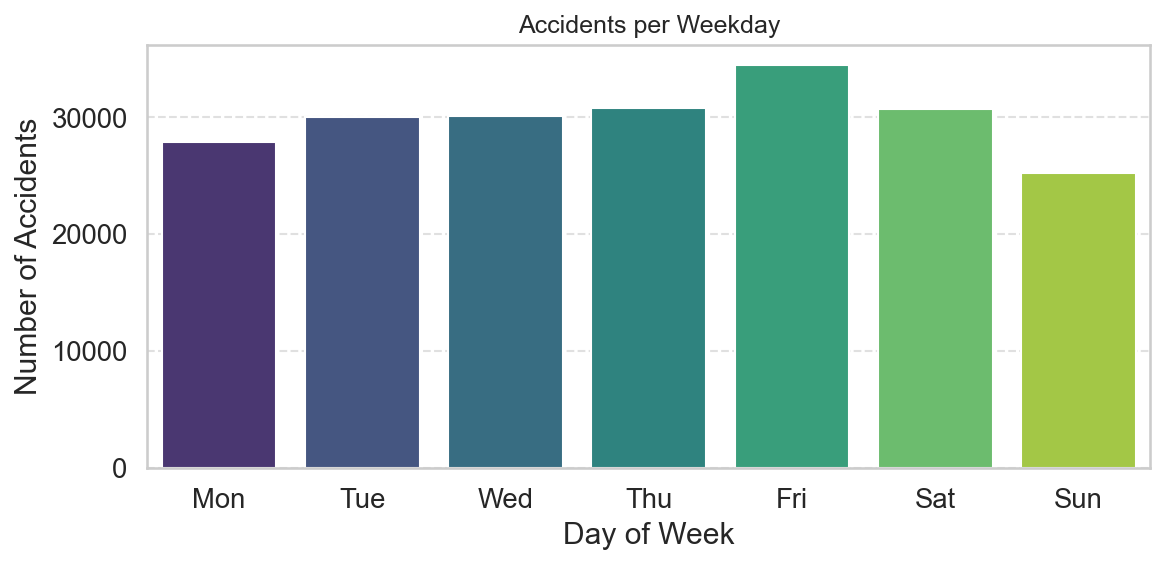

In [237]:
# Accidents per weekday
# Count number of accidents per weekday
weekday_counts = df_csv_data['crash_day_of_week'].value_counts().sort_index()

# Plot
# Map numeric days to short names (assumes 1=Sunday, 2=Monday, ..., 7=Saturday)
day_map = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}
wc = weekday_counts.reset_index()
wc.columns = ["day_num", "count"]
wc["day_name"] = wc["day_num"].map(day_map)

# Order Monday -> Sunday
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
wc["day_name"] = pd.Categorical(wc["day_name"], categories=order, ordered=True)
wc = wc.sort_values("day_name")

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=wc, x="day_name", y="count", palette="viridis")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Accidents")
ax.set_title("Accidents per Weekday", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

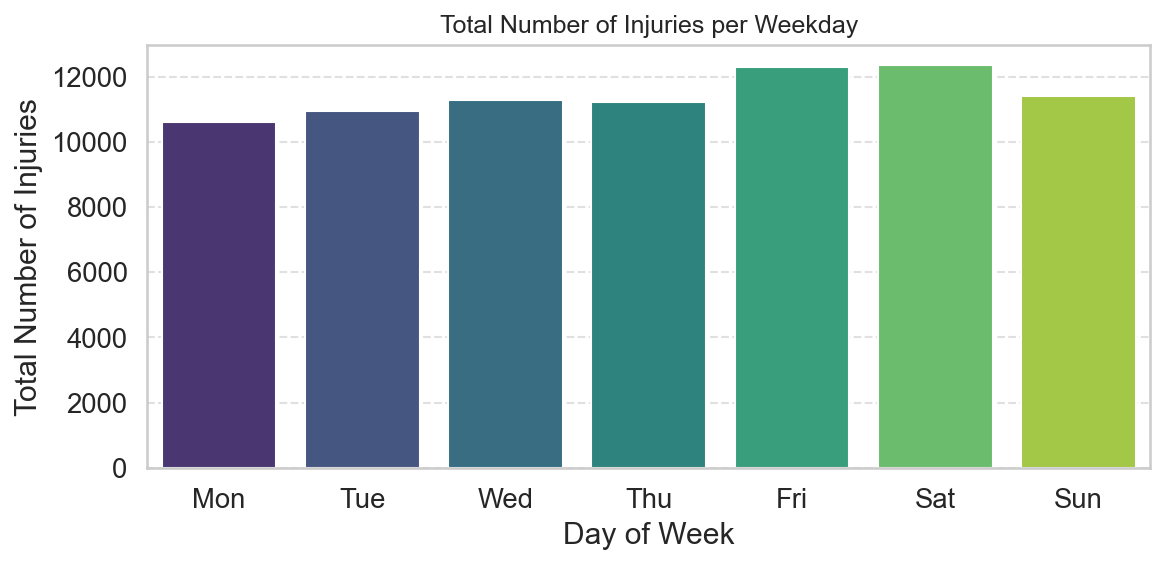

In [239]:
# Nicely styled barplot for total injuries per weekday
day_map = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}
wc = weekday_injuries.reset_index()
wc.columns = ["day_num", "injuries"]
wc["day_name"] = wc["day_num"].map(day_map)

# Order Monday -> Sunday
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
wc["day_name"] = pd.Categorical(wc["day_name"], categories=order, ordered=True)
wc = wc.sort_values("day_name")

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=wc, x="day_name", y="injuries", palette="viridis")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Total Number of Injuries")
ax.set_title("Total Number of Injuries per Weekday", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.6)
# ax.tick_params(axis="x", labelsize=6)
# ax.tick_params(axis="y", labelsize=6)

plt.tight_layout()
plt.show()


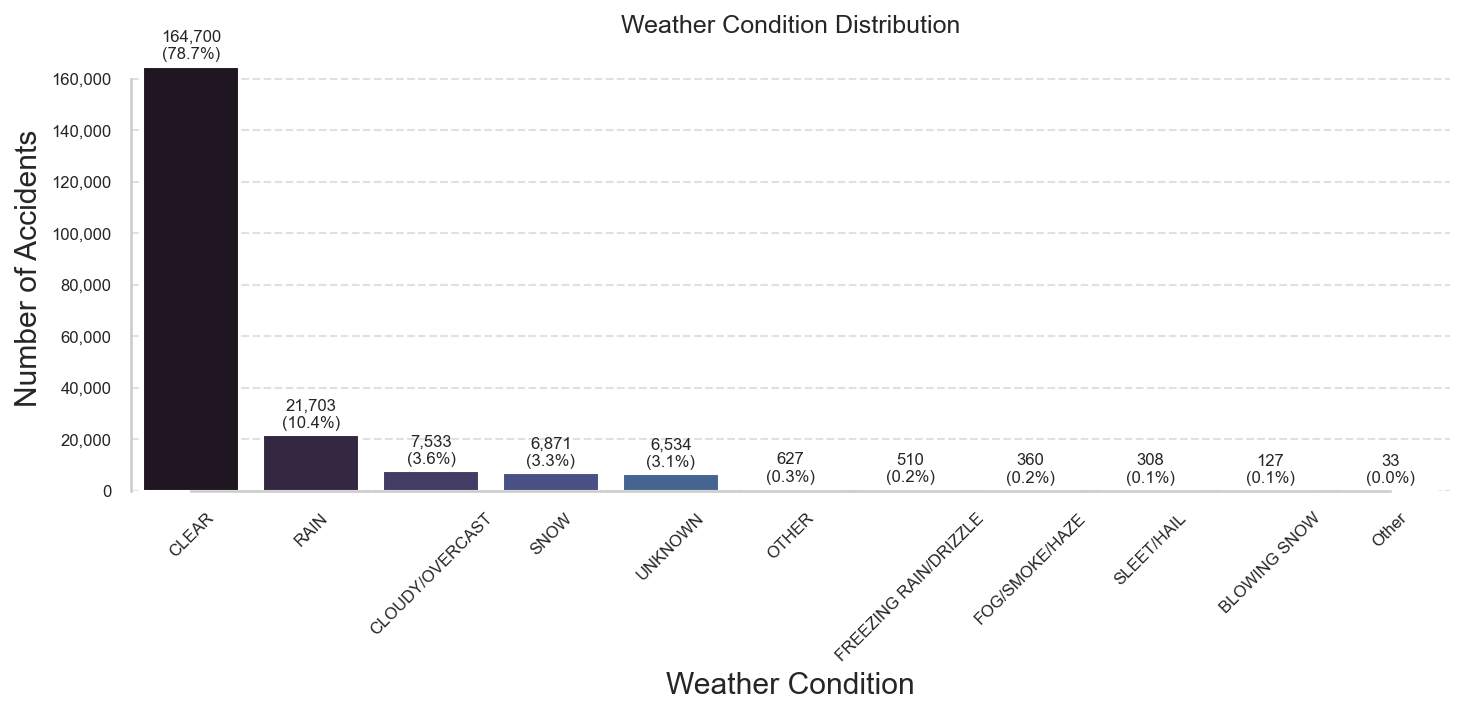

In [245]:
# Nicely styled weather condition distribution (top categories + "Other")
vc = df_csv_data["weather_condition"].fillna("UNKNOWN").value_counts()
top_n = 10
if len(vc) > top_n:
    top = vc.head(top_n).copy()
    top["Other"] = vc.iloc[top_n:].sum()
else:
    top = vc.copy()

df_plot = top.reset_index()
df_plot.columns = ["weather", "count"]
df_plot["pct"] = df_plot["count"] / df_plot["count"].sum() * 100

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_plot, x="weather", y="count", palette="mako")
ax.set_title("Weather Condition Distribution", fontsize=12)
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Number of Accidents")
ax.tick_params(axis="x", rotation=45, labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Annotate bars with count and percentage
max_count = df_plot["count"].max()
for p, cnt, pct in zip(ax.patches, df_plot["count"], df_plot["pct"]):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + max_count * 0.01,
            f"{int(cnt):,}\n({pct:.1f}%)", ha="center", va="bottom", fontsize=8)

plt.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.show()

In [214]:
# Analysis of correlation between injuries and weather condition
df_csv_data.groupby("weather_condition")["injuries_total"].agg(
    ["count", "mean", "median", "std"]
)

count      mean  median       std
weather_condition                                           
BLOWING SAND, SOIL, DIRT       1  0.000000     0.0       NaN
BLOWING SNOW                 127  0.314961     0.0  0.752781
CLEAR                     164700  0.390401     0.0  0.812737
CLOUDY/OVERCAST             7533  0.369308     0.0  0.745190
FOG/SMOKE/HAZE               360  0.444444     0.0  0.829285
FREEZING RAIN/DRIZZLE        510  0.460784     0.0  0.864851
OTHER                        627  0.483254     0.0  0.821607
RAIN                       21703  0.411510     0.0  0.808552
SEVERE CROSS WIND GATE        32  0.250000     0.0  0.762001
SLEET/HAIL                   308  0.461039     0.0  0.851388
SNOW                        6871  0.308543     0.0  0.698708

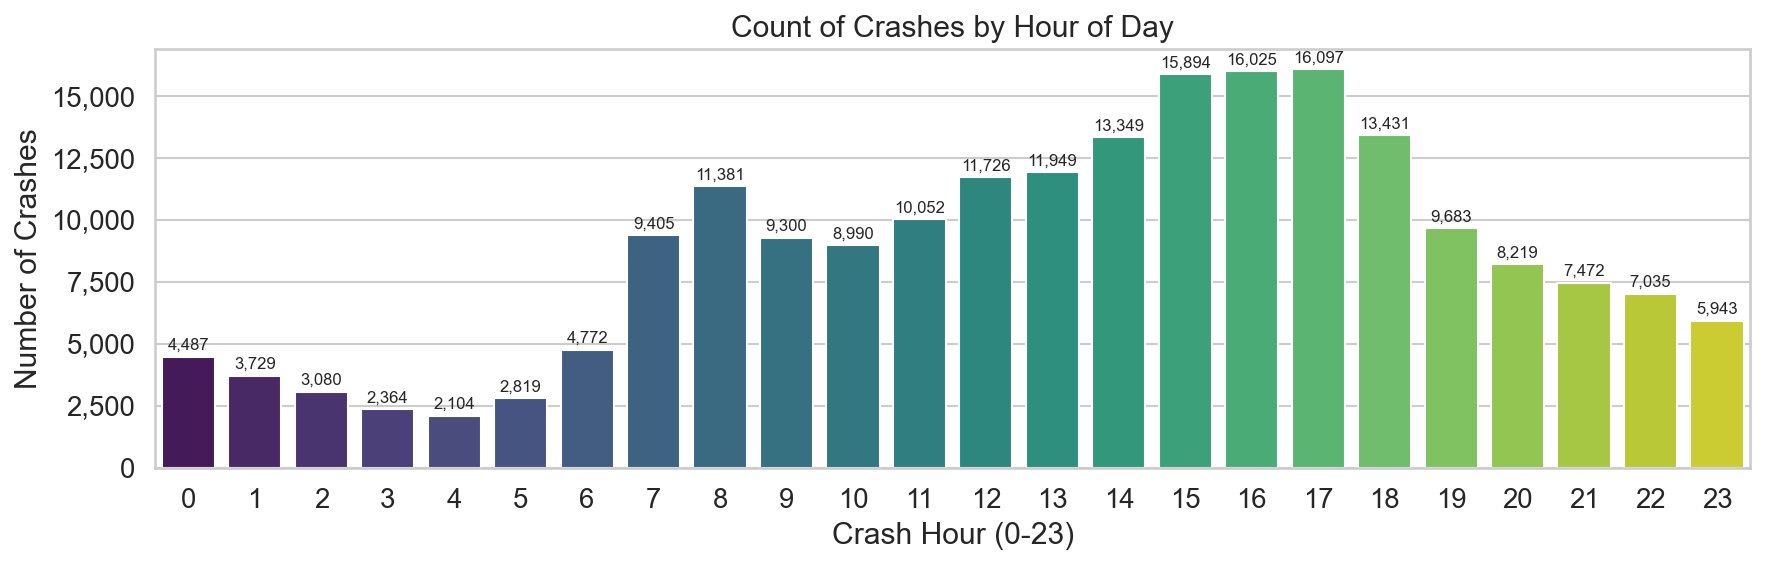

In [248]:
# Count crashes per hour and plot
hour_counts = df_csv_data["crash_hour"].dropna().astype(int).value_counts().sort_index()

# Ensure hours 0-23 are present
hours = pd.Series(0, index=range(24))
hour_counts = hours.add(hour_counts, fill_value=0).astype(int)

df_hour = hour_counts.reset_index()
df_hour.columns = ["hour", "count"]

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df_hour, x="hour", y="count", palette="viridis")
ax.set_xlabel("Crash Hour (0-23)")
ax.set_ylabel("Number of Crashes")
ax.set_title("Count of Crashes by Hour of Day")
ax.set_xticks(range(24))
ax.set_xticklabels([str(h) for h in range(24)])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Annotate bars
max_count = df_hour["count"].max()
for p, cnt in zip(ax.patches, df_hour["count"]):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + max_count * 0.01,
            f"{int(cnt):,}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

### Original data quality analysis with visualization
**Missingness Patterns**

In [216]:
missing_counts = df_csv_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

road_defect               34426
roadway_surface_cond      12509
weather_condition          6534
traffic_control_device     4455
lighting_condition         4336
trafficway_type            1060
dtype: int64

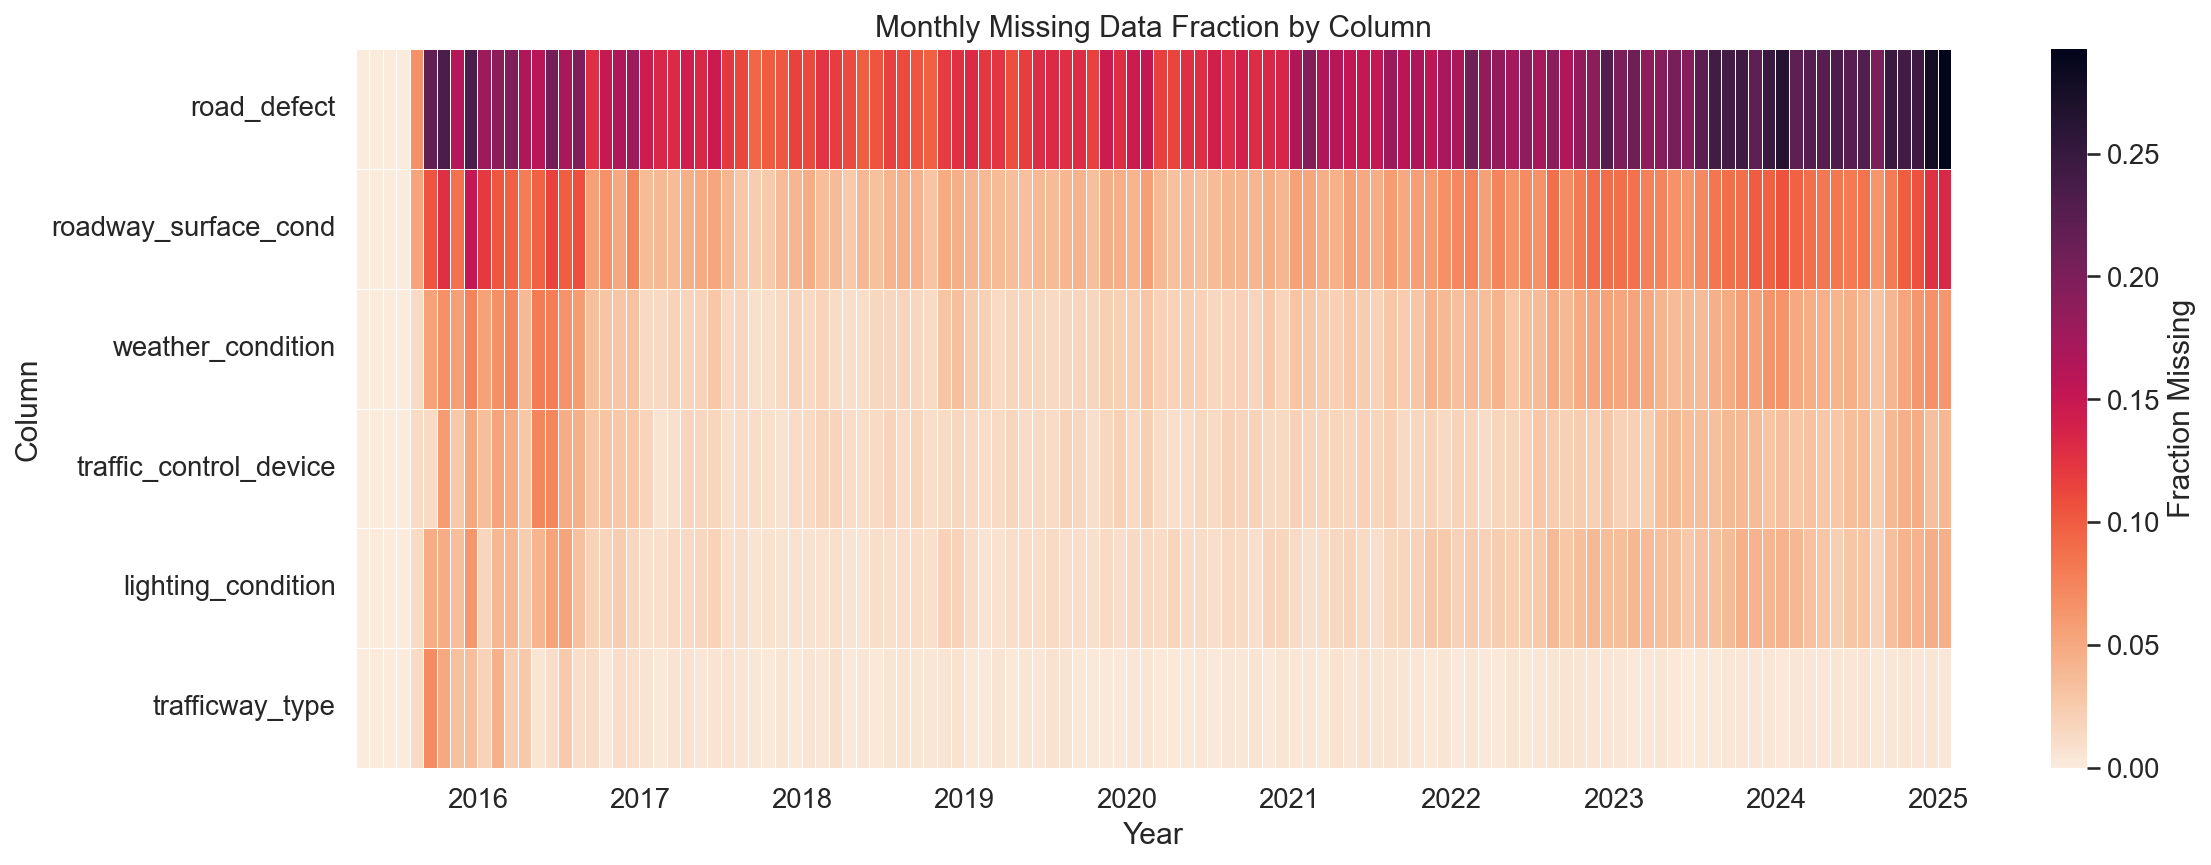

In [217]:
cols = [
    "road_defect",
    "roadway_surface_cond",
    "weather_condition",
    "traffic_control_device",
    "lighting_condition",
    "trafficway_type"
]

# Ensure datetime
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Keep only relevant columns
df = df[["crash_date"] + cols]

# Create monthly period
df["month"] = df["crash_date"].dt.to_period("M")

# Calculate fraction missing per month per column
monthly_missing = (
    df.groupby("month")[cols]
      .apply(lambda x: x.isna().mean())
)

# Convert PeriodIndex to timestamp for plotting
monthly_missing.index = monthly_missing.index.to_timestamp()

# Plot heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(
    monthly_missing.T,
    cmap="rocket_r",
    cbar_kws={"label": "Fraction Missing"},
    linewidths=0.3
)

# Year-only x-axis ticks
months = monthly_missing.index
year_ticks = [i for i, d in enumerate(months) if d.month == 1]
year_labels = [d.year for d in months if d.month == 1]

ax.set_xticks(year_ticks)
ax.set_xticklabels(year_labels, rotation=0)

plt.title("Monthly Missing Data Fraction by Column")
plt.xlabel("Year")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


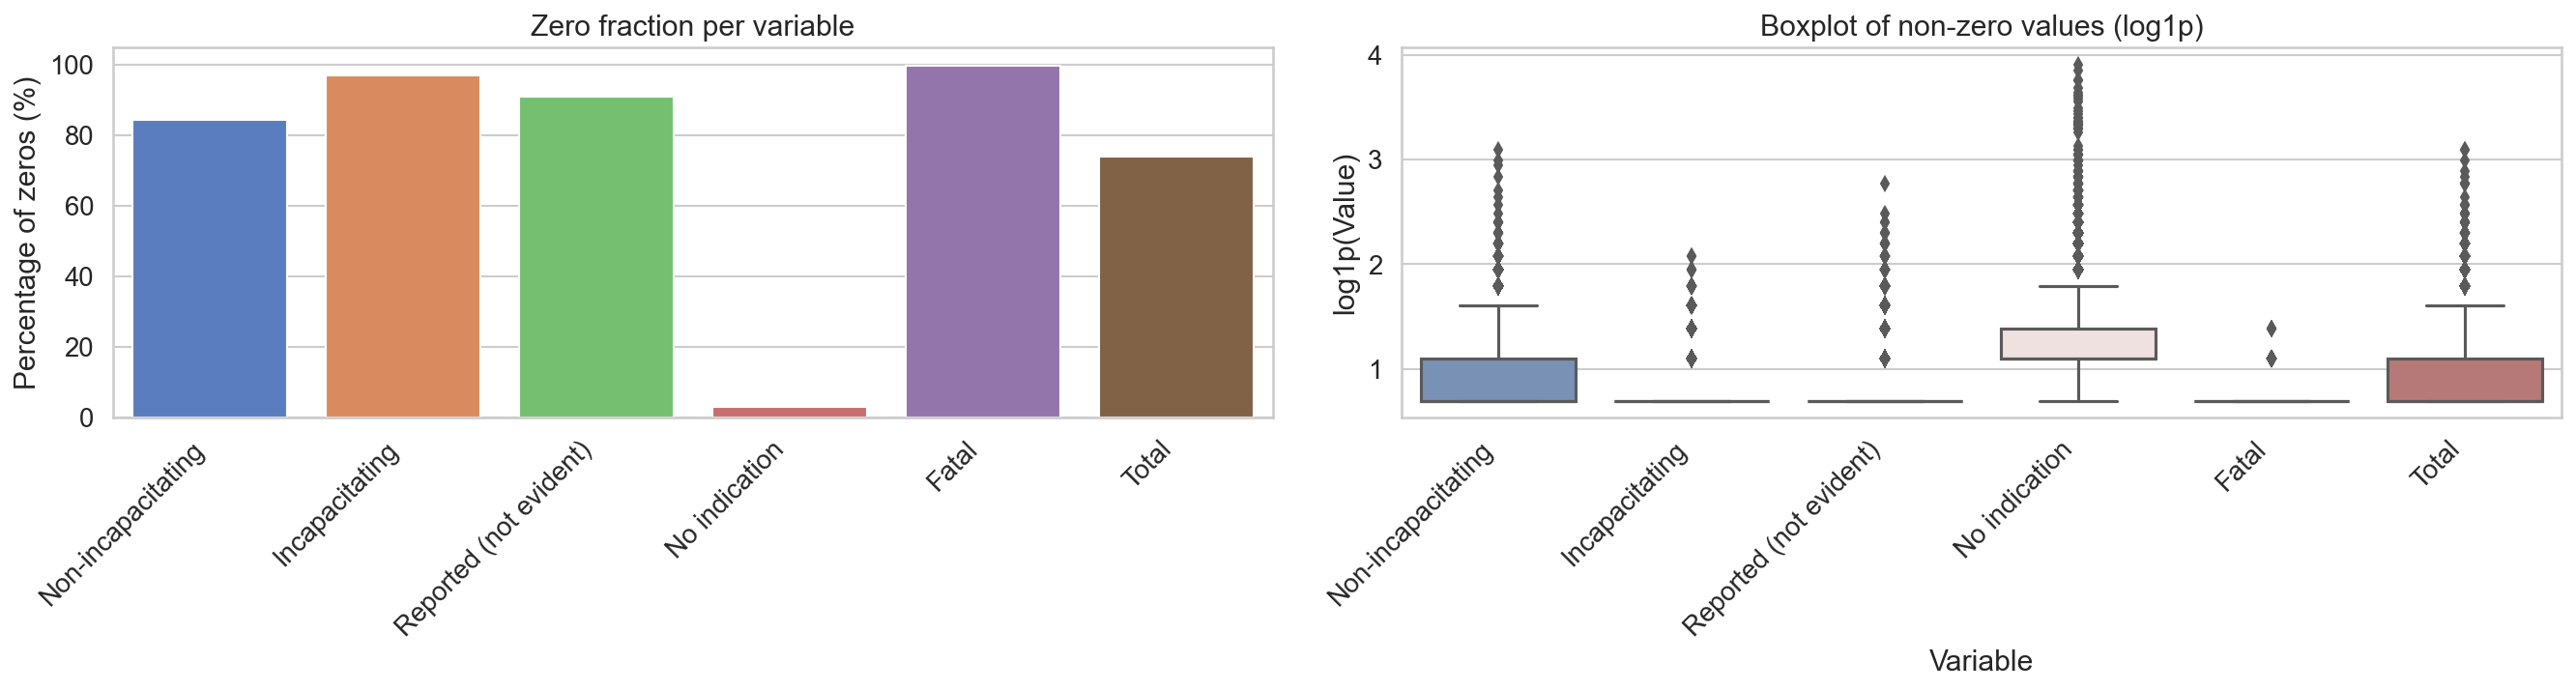

In [244]:
# Show zero fraction + distributions of non-zero values on log1p scale
col_names = [
    "injuries_non_incapacitating",
    "injuries_incapacitating",
    "injuries_reported_not_evident",
    "injuries_no_indication",
    "injuries_fatal",
    "injuries_total"
]

selected = df_csv_data[col_names]

# Zero fraction (ignoring NaNs)
non_na_counts = selected.notna().sum()
zero_frac = (selected == 0).sum() / non_na_counts

# Melt non-zero values and add log1p transform
df_melted = selected.melt(var_name="Variable", value_name="Value")
df_nonzero = df_melted[df_melted["Value"] > 0].copy()
df_nonzero["log1p"] = np.log1p(df_nonzero["Value"])

fig, axs = plt.subplots(1, 2, figsize=(18, 5), gridspec_kw={"width_ratios": [1, 1]})

# 1) Zero fraction
sns.barplot(x=zero_frac.index, y=zero_frac.values * 100, ax=axs[0], palette="muted")
axs[0].set_ylabel("Percentage of zeros (%)")
axs[0].set_xlabel("")
axs[0].set_title("Zero fraction per variable")
axs[0].tick_params(axis="x", rotation=45)

# 2) Boxplot on log1p of non-zero values
sns.boxplot(data=df_nonzero, x="Variable", y="log1p", ax=axs[1], showcaps=True, showfliers=True, palette="vlag")
axs[1].set_ylabel("log1p(Value)")
axs[1].set_title("Boxplot of non-zero values (log1p)")
axs[1].tick_params(axis="x", rotation=45)

pretty_labels = [
    "Non-incapacitating",
    "Incapacitating",
    "Reported (not evident)",
    "No indication",
    "Fatal",
    "Total"
]

for ax in axs:
    ax.set_xticks(range(len(pretty_labels)))
    ax.set_xticklabels(pretty_labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [220]:
# Check for typos, different capitalizations, or inconsistent entries in categorical columns

for col in df_csv_data.select_dtypes(include="object"):
    print(col)
    print(df_csv_data[col].value_counts().head())
    print("-"*40)

# No typos or inconsistencies found in categorical columns

crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
09/11/2019 04:30:00 PM     6
01/12/2019 02:30:00 PM     6
11/26/2018 08:30:00 AM     6
Name: crash_date, dtype: int64
----------------------------------------
traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
OTHER                   670
YIELD                   468
Name: traffic_control_device, dtype: int64
----------------------------------------
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
OTHER                 627
Name: weather_condition, dtype: int64
----------------------------------------
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
DAWN                        3724
Name: lighting_condition, dtype: int64
----------------------------------------
first_crash_type
TURNING          

**Analysis of Timestamp Gaps**

In [221]:
# Ensure datetime and sort
df = df_csv_data.copy()
df["crash_date"] = pd.to_datetime(df["crash_date"])
df = df.sort_values("crash_date")

# Calculate gaps between consecutive accidents
df["time_gap"] = df["crash_date"].diff()

# Drop the first row (NaT gap)
gaps = df.dropna(subset=["time_gap"])

# Filter gaps greater than 1 day
long_gaps = (
    gaps[gaps["time_gap"] > pd.Timedelta(days=1)]
    [["crash_date", "time_gap"]]
    .rename(columns={"crash_date": "gap_end"})
)

# Add gap start for clarity
long_gaps["gap_start"] = long_gaps["gap_end"] - long_gaps["time_gap"]

# Optional: sort largest gaps first
long_gaps = long_gaps.sort_values("time_gap", ascending=False)

long_gaps


gap_end          time_gap           gap_start
121162 2015-02-13 08:00:00 621 days 11:31:00 2013-06-01 20:29:00
132318 2015-05-25 23:38:00 101 days 15:38:00 2015-02-13 08:00:00
23119  2013-06-01 20:29:00  90 days 03:41:00 2013-03-03 16:48:00
106211 2015-08-02 19:55:00  68 days 20:17:00 2015-05-25 23:38:00
46652  2015-08-14 09:30:00   2 days 19:15:00 2015-08-11 14:15:00
42585  2015-08-06 10:00:00   1 days 19:30:00 2015-08-04 14:30:00
1958   2015-08-10 09:15:00   1 days 12:00:00 2015-08-08 21:15:00
15595  2015-08-17 01:11:00   1 days 10:11:00 2015-08-15 15:00:00
96371  2015-08-11 14:15:00   1 days 05:00:00 2015-08-10 09:15:00

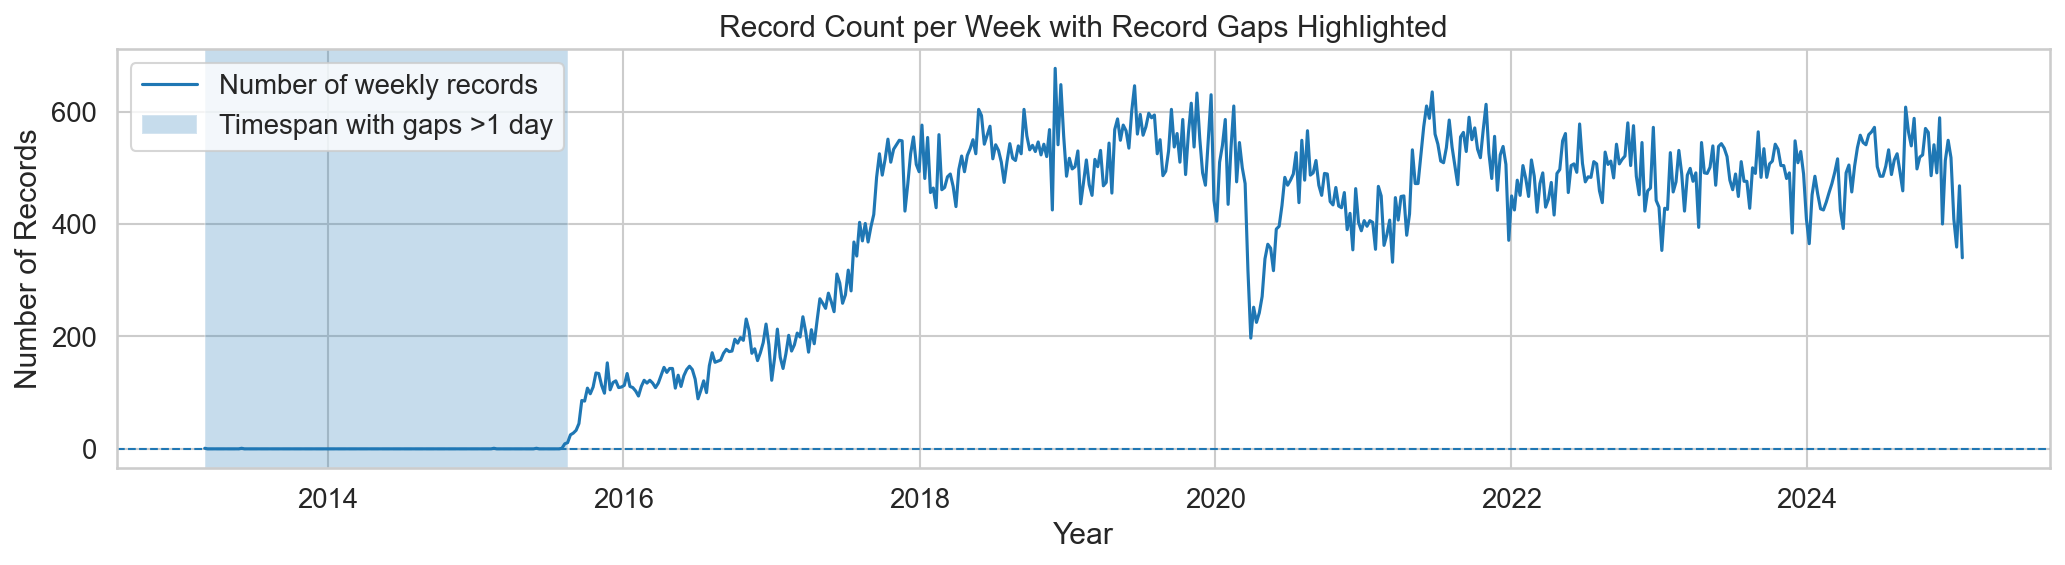

In [222]:
# Ensure datetime
df["crash_date"] = pd.to_datetime(df["crash_date"])

# Weekly record counts
weekly_counts = (
    df.set_index("crash_date")
      .resample("W")
      .size()
)

# Compute overall gap span
gap_span_start = long_gaps["gap_start"].min()
gap_span_end = long_gaps["gap_end"].max()

# Plot full timeline
plt.figure(figsize=(14, 4))
plt.plot(weekly_counts.index, weekly_counts.values, label="Number of weekly records")
plt.axhline(0, linestyle="--", linewidth=1)

# Highlight overall gap timespan
plt.axvspan(
    gap_span_start,
    gap_span_end,
    alpha=0.25,
    label="Timespan with gaps >1 day"
)

plt.title("Record Count per Week with Record Gaps Highlighted")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend()

plt.tight_layout()
plt.show()


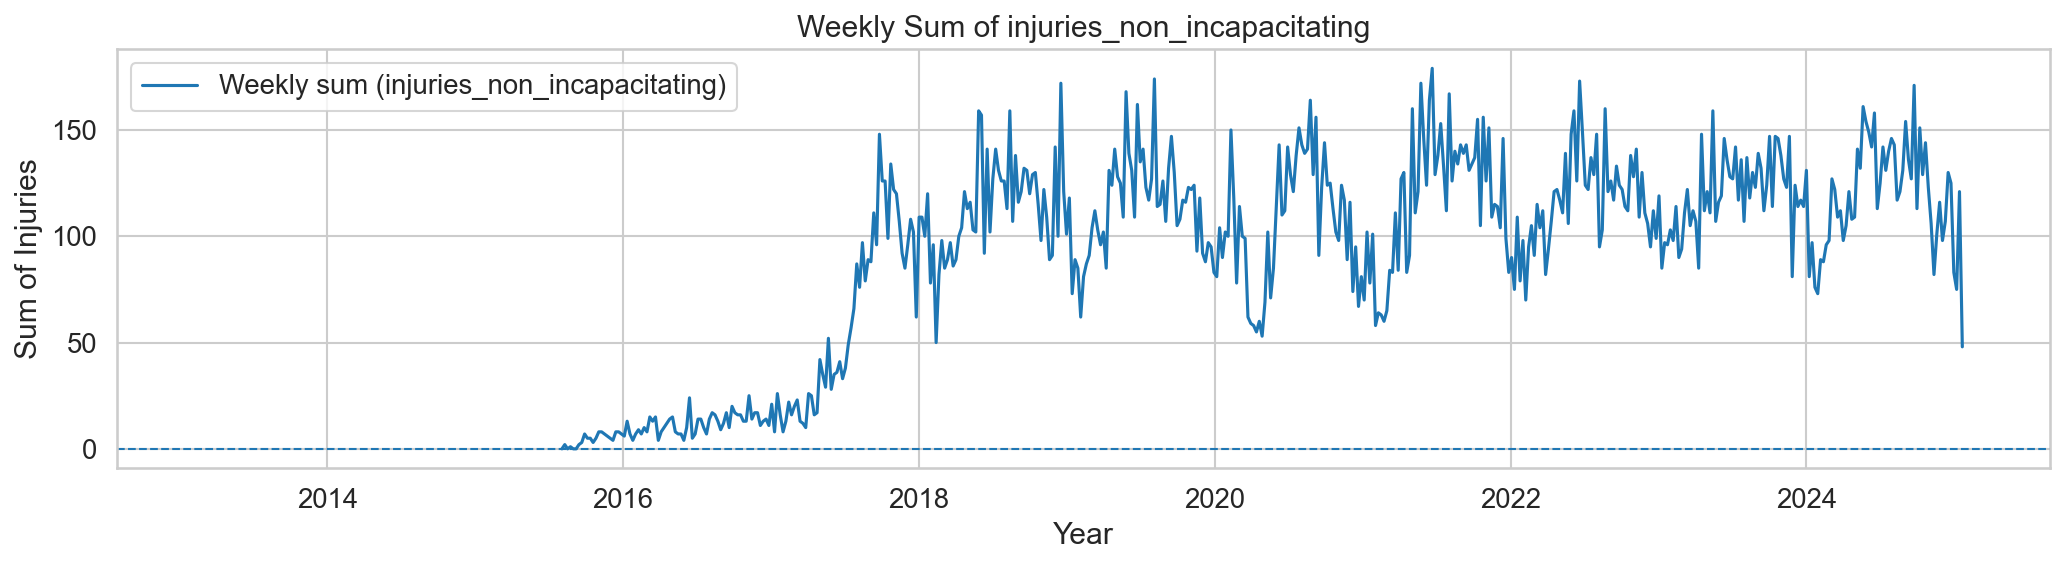

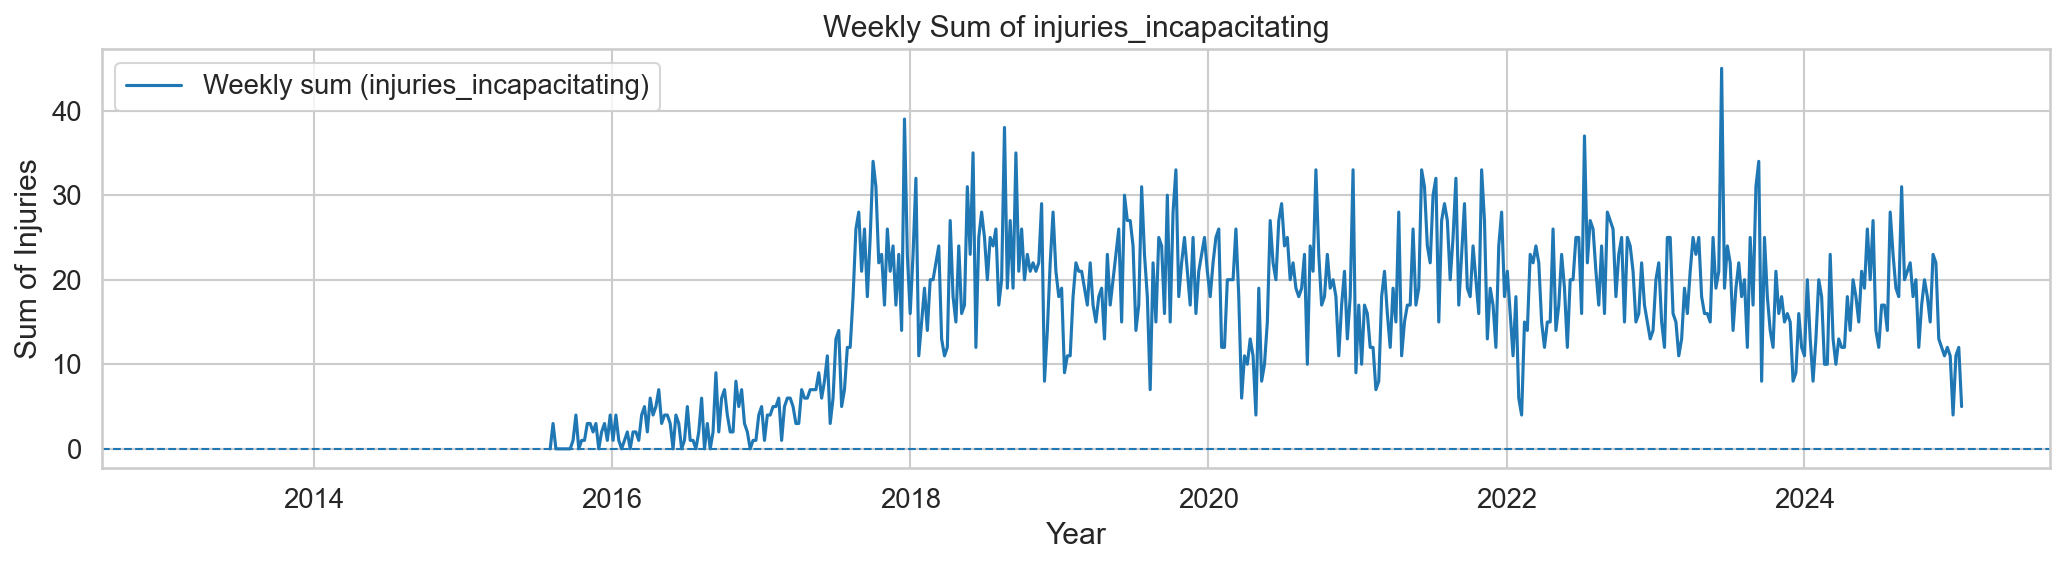

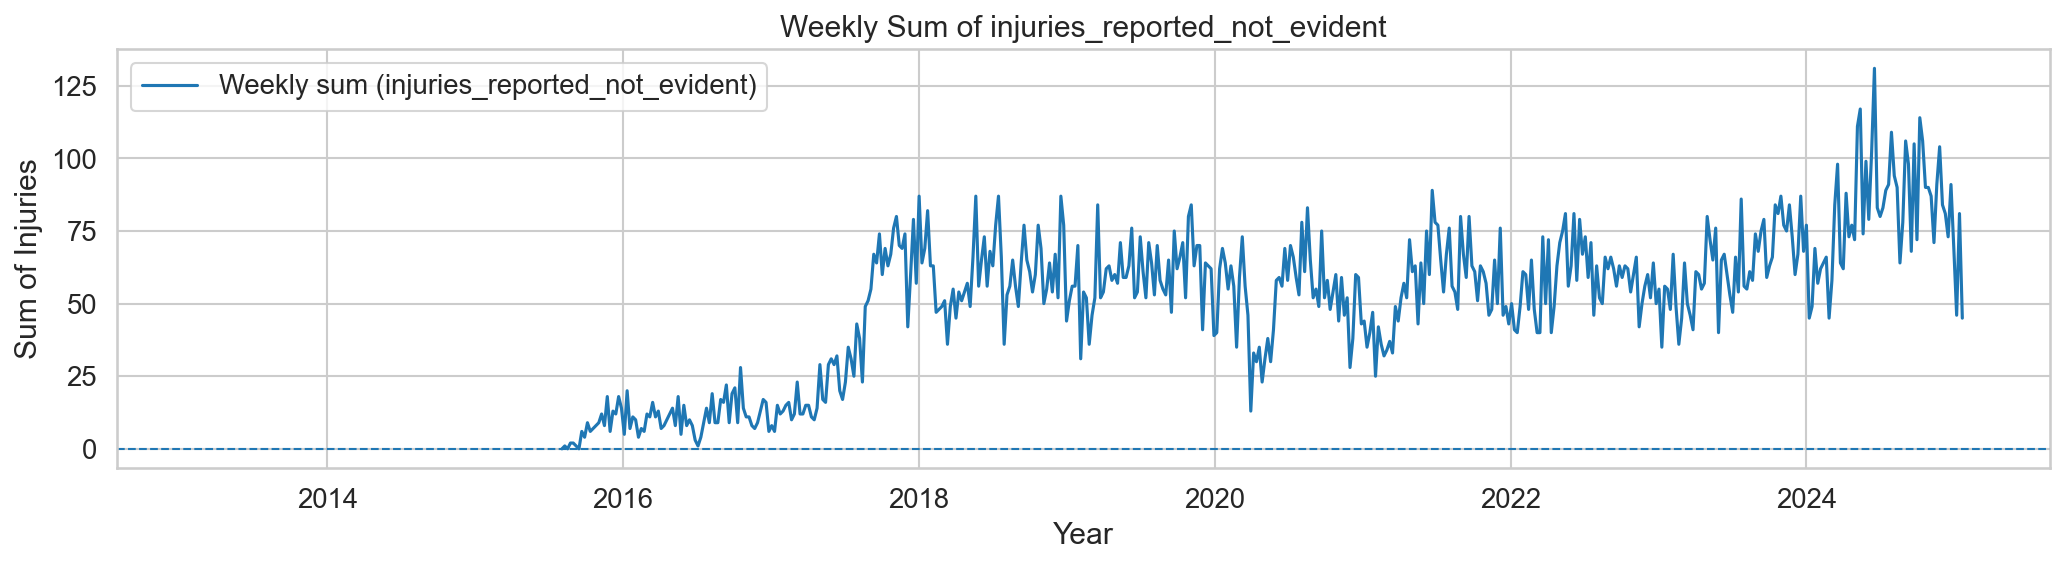

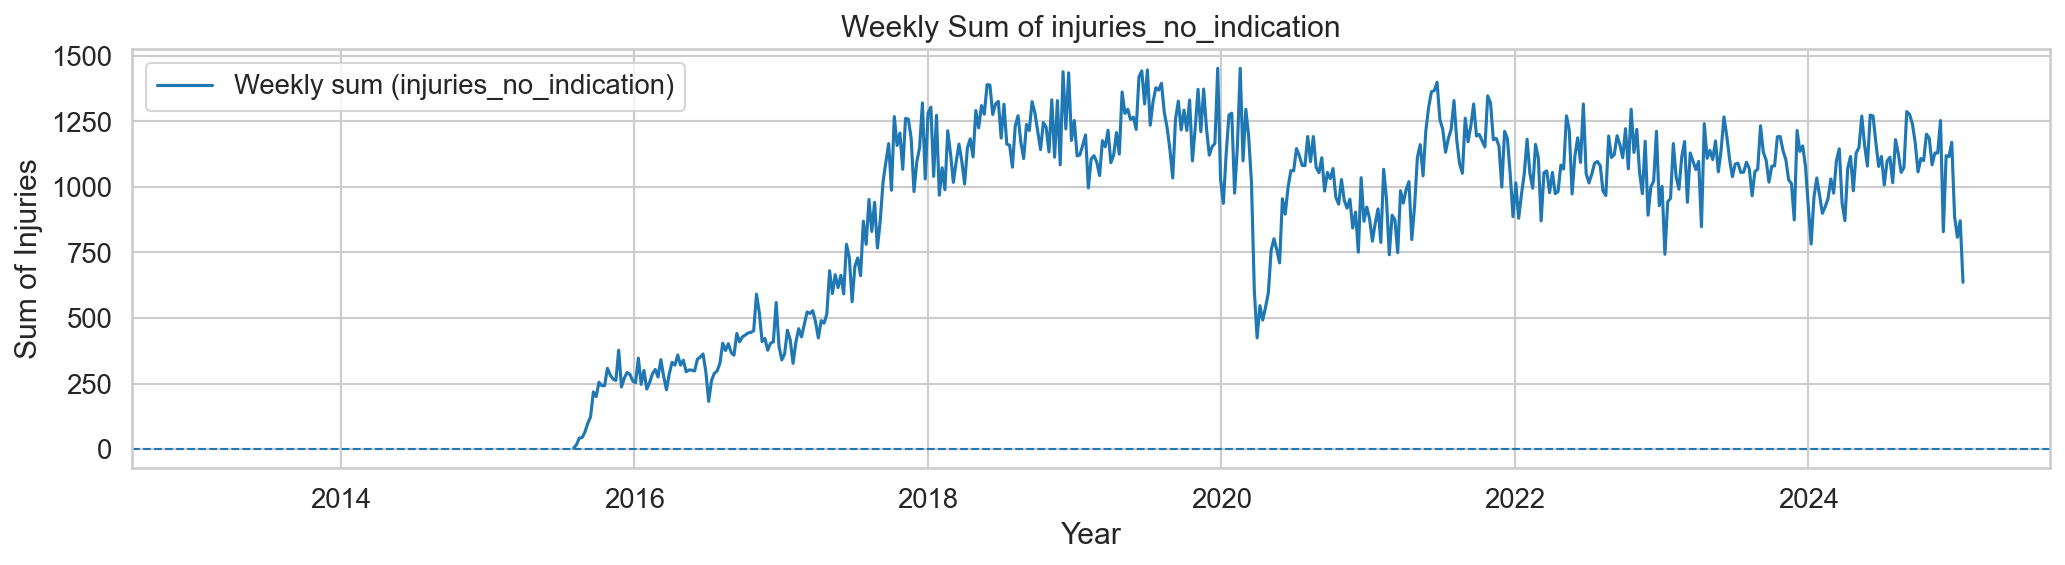

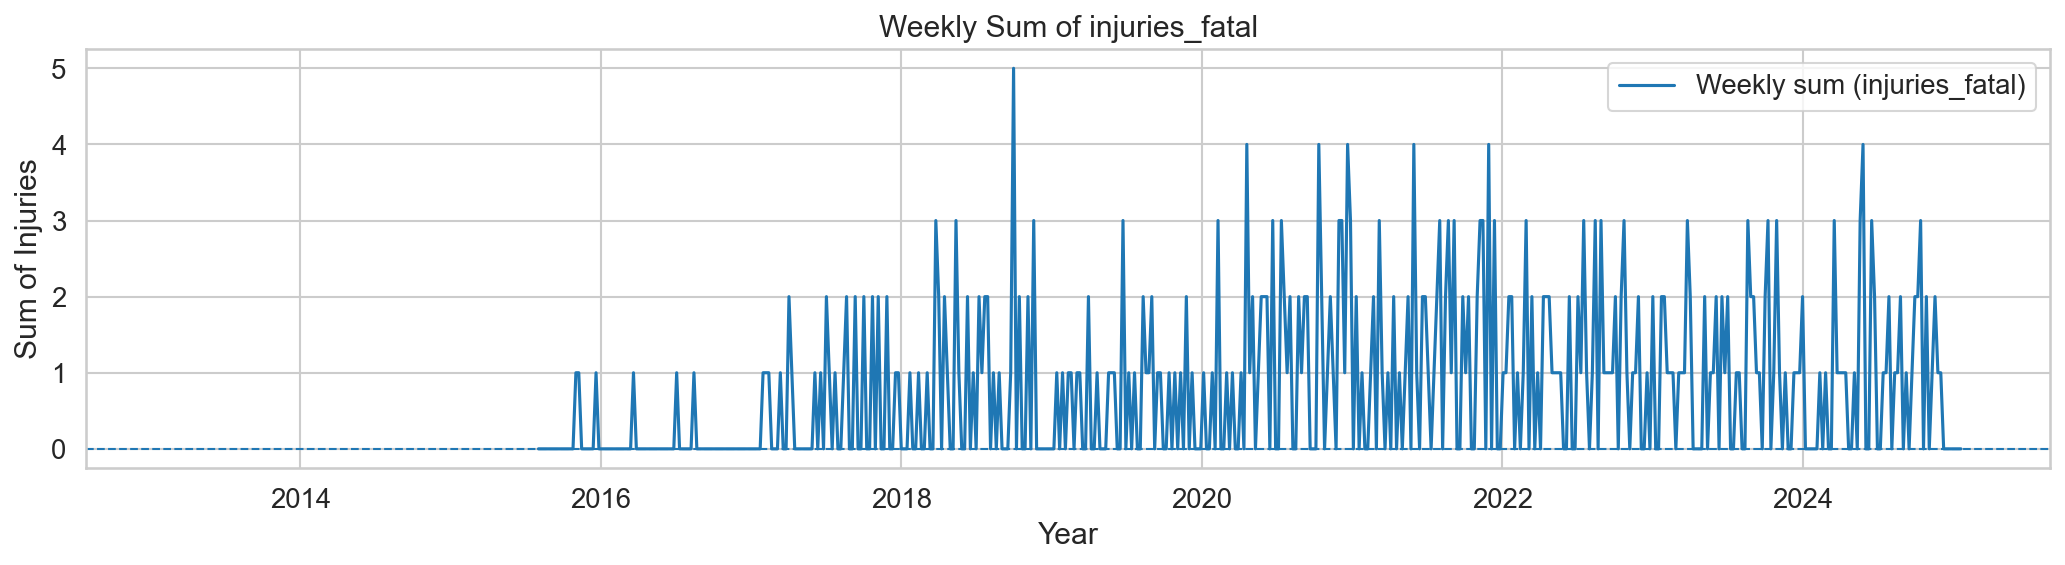

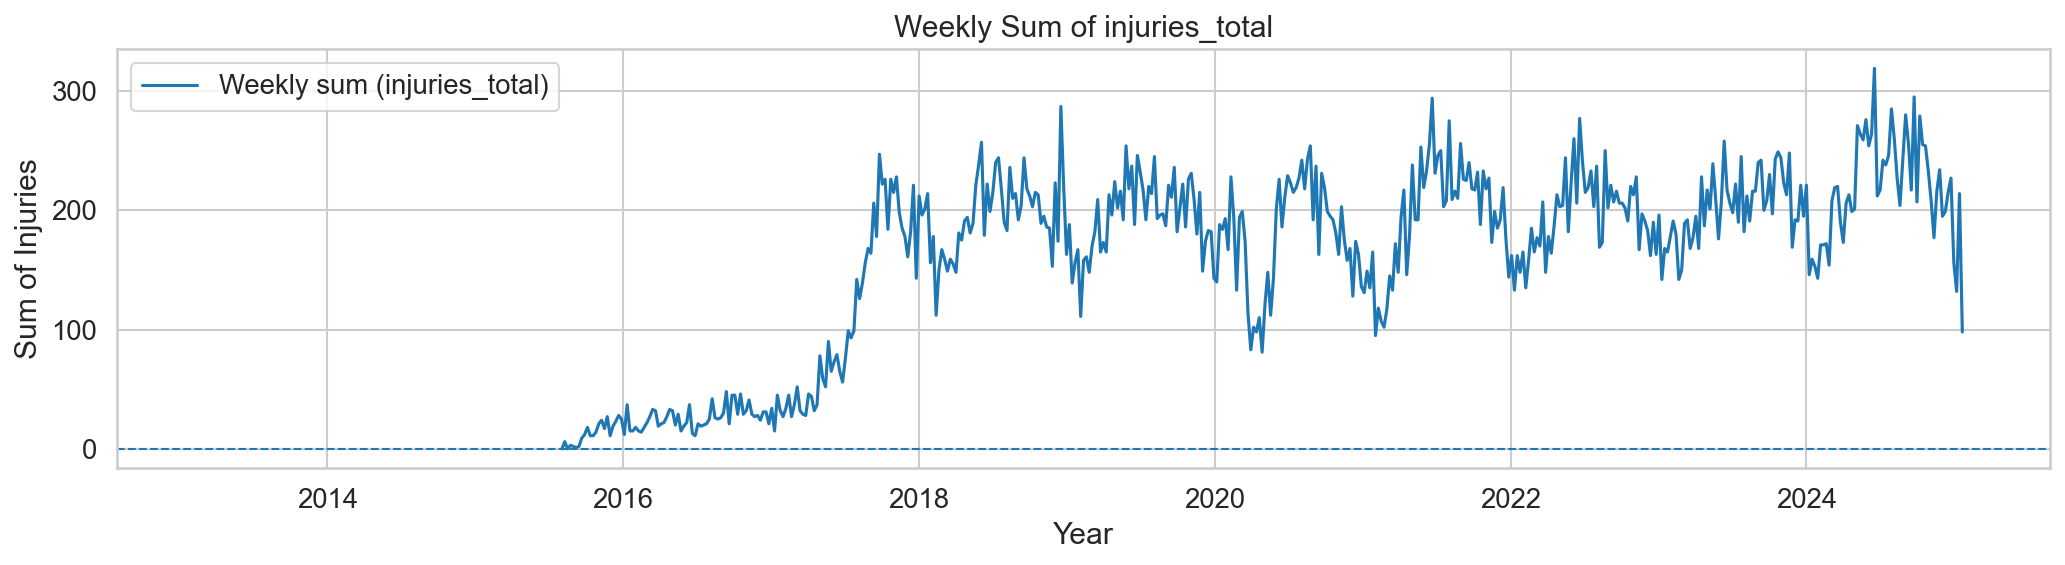

In [223]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly and sum values
    weekly_sum_col = (
        df_plot.set_index("crash_date")[col]
        .resample("W-MON")
        .sum(min_count=1)  # min_count=1 ensures empty weeks show NaN instead of 0
    )

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_sum_col.index, weekly_sum_col.values, label=f"Weekly sum ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Cleaning Data**
To clean the data the decision was made to remove all data entries before November of 2017. The reason for that is that there is way more data being sampled after that. The sampling frequency seems inconsistent before and rather consisten after November fo 2017.

In [224]:
# Make a copy and ensure datetime
df_csv_data_cleaned = df_csv_data.copy()
df_csv_data_cleaned["crash_date"] = pd.to_datetime(df_csv_data_cleaned["crash_date"])

# Remove entries before November 2017
df_csv_data_cleaned = df_csv_data_cleaned[df_csv_data_cleaned["crash_date"] >= "2017-11-01"]

Visualizing removed data.

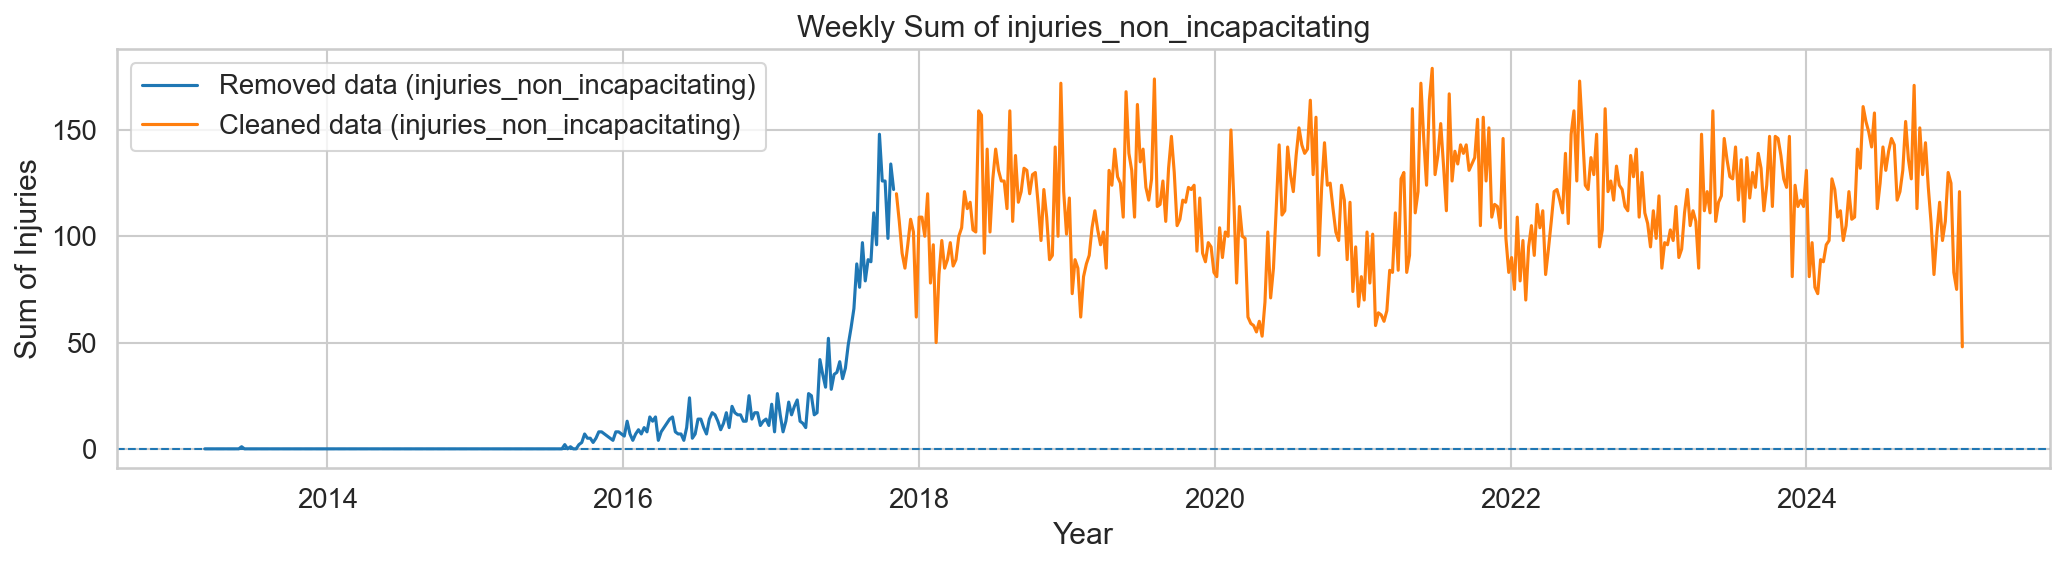

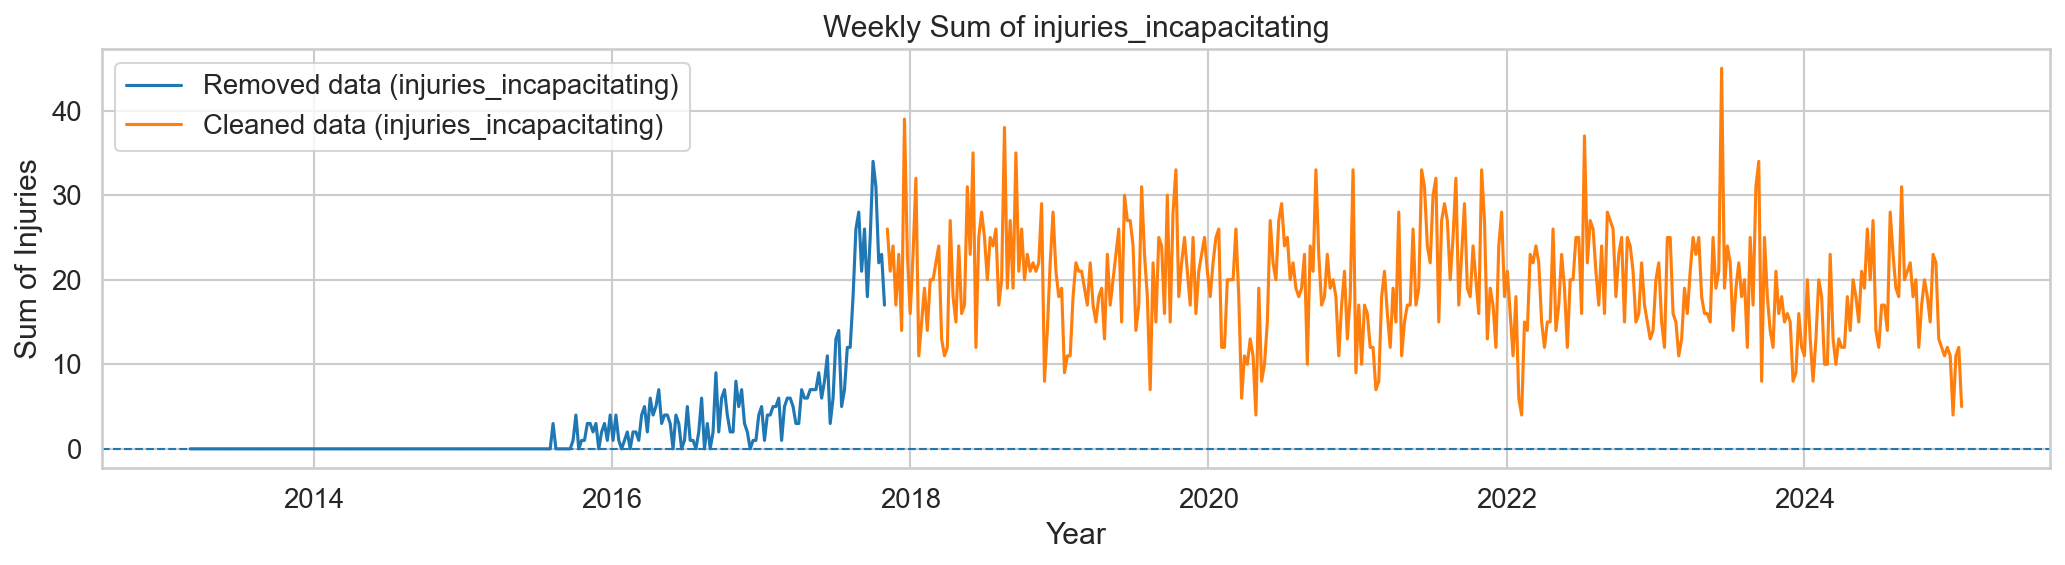

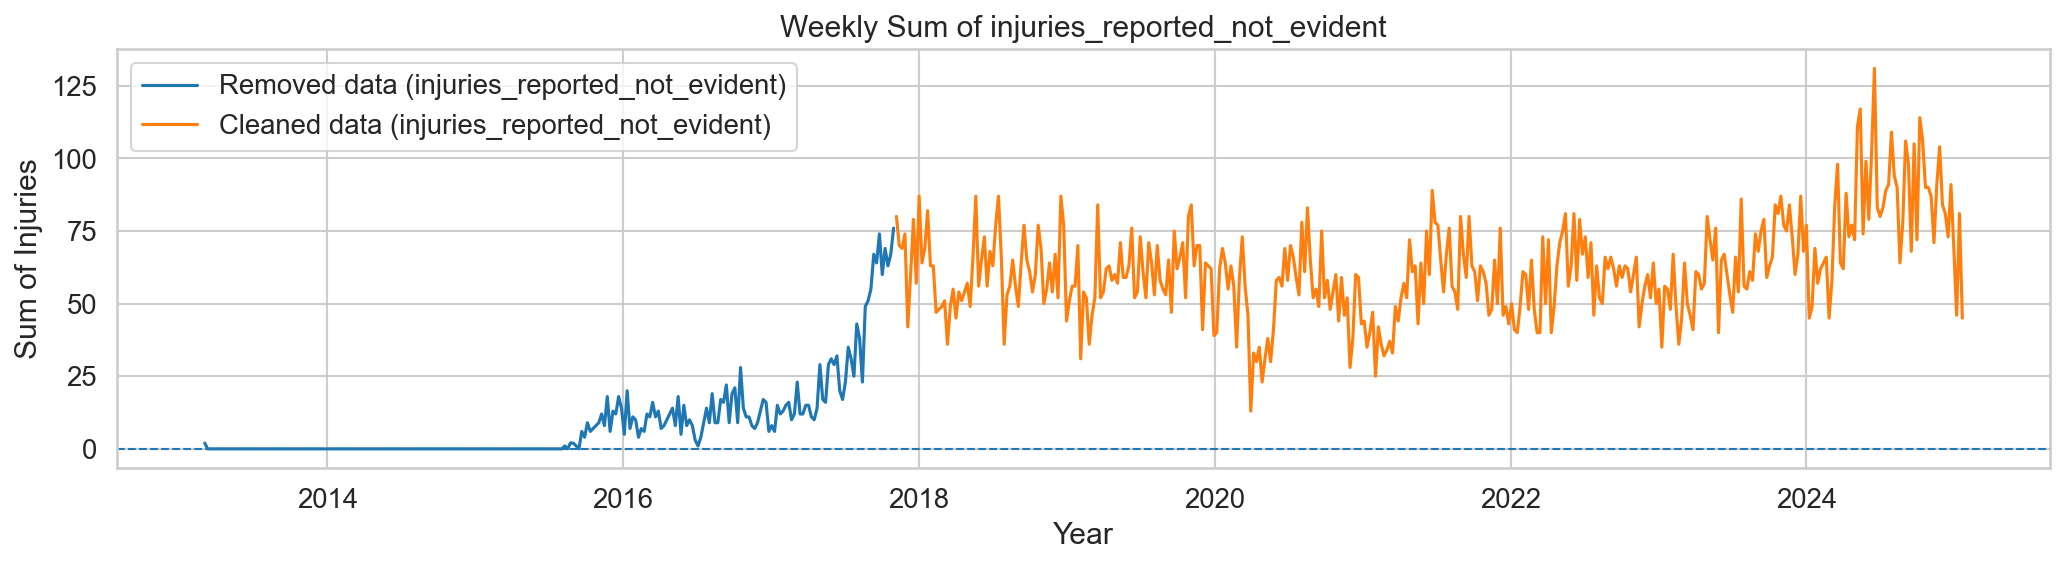

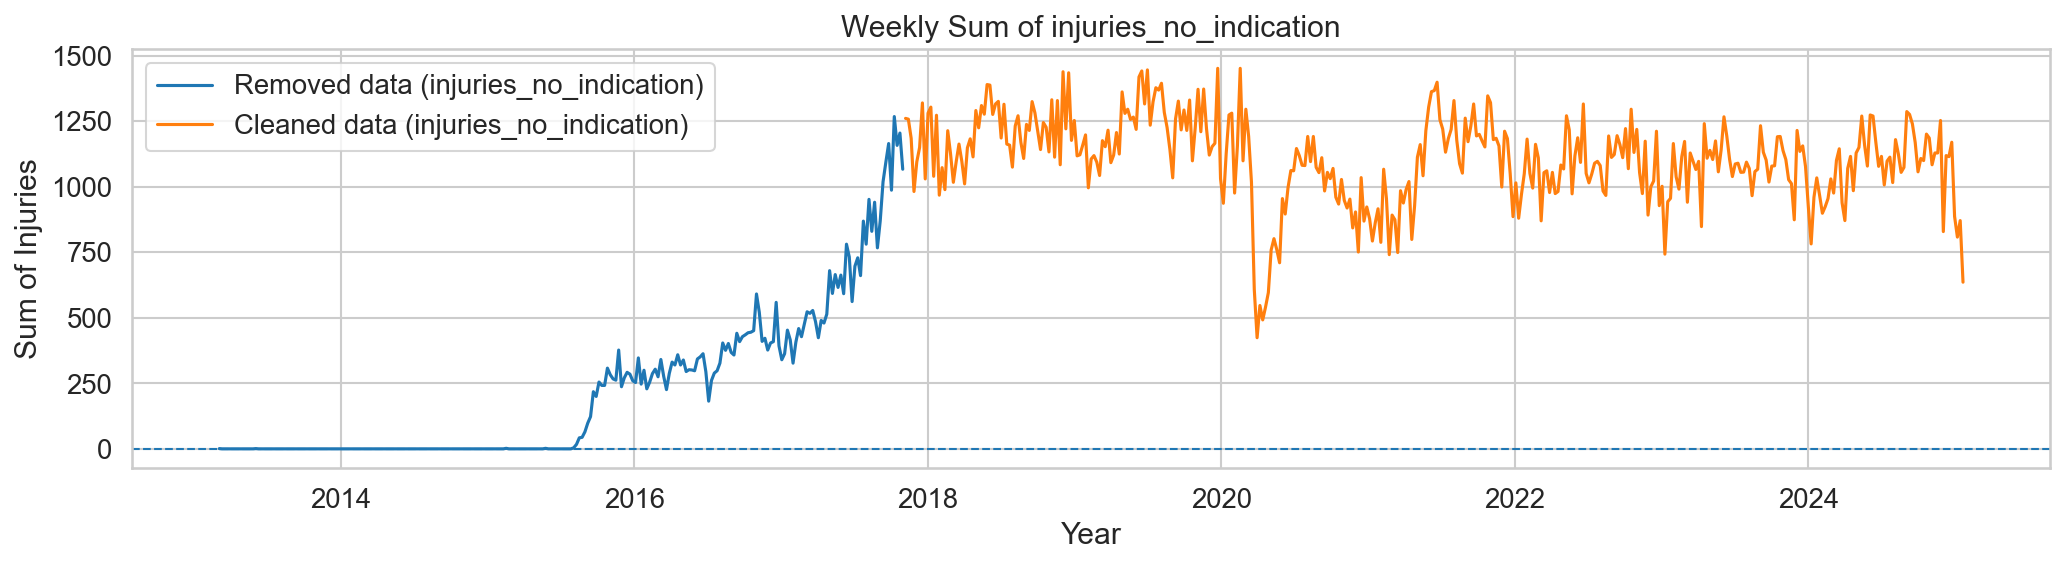

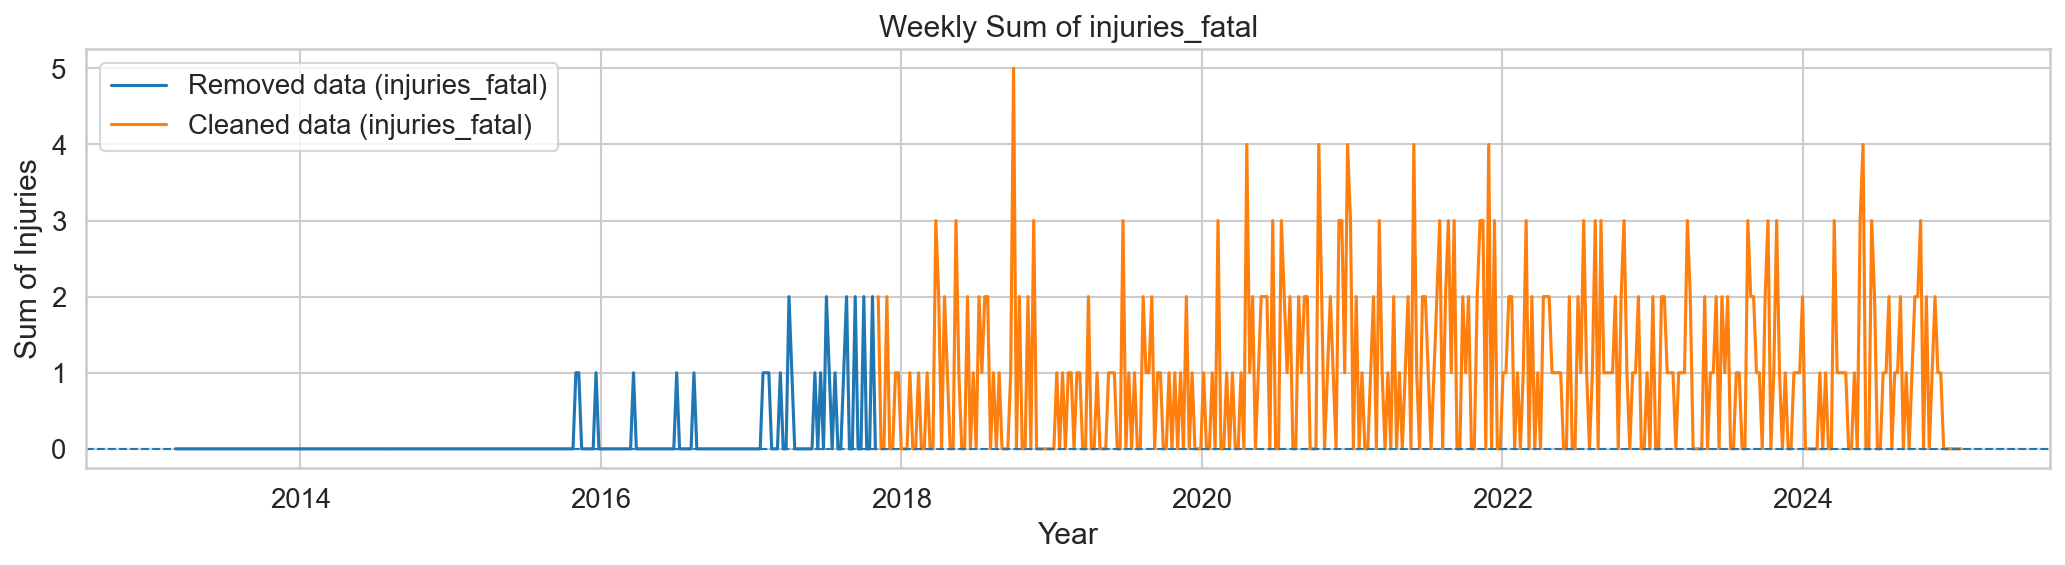

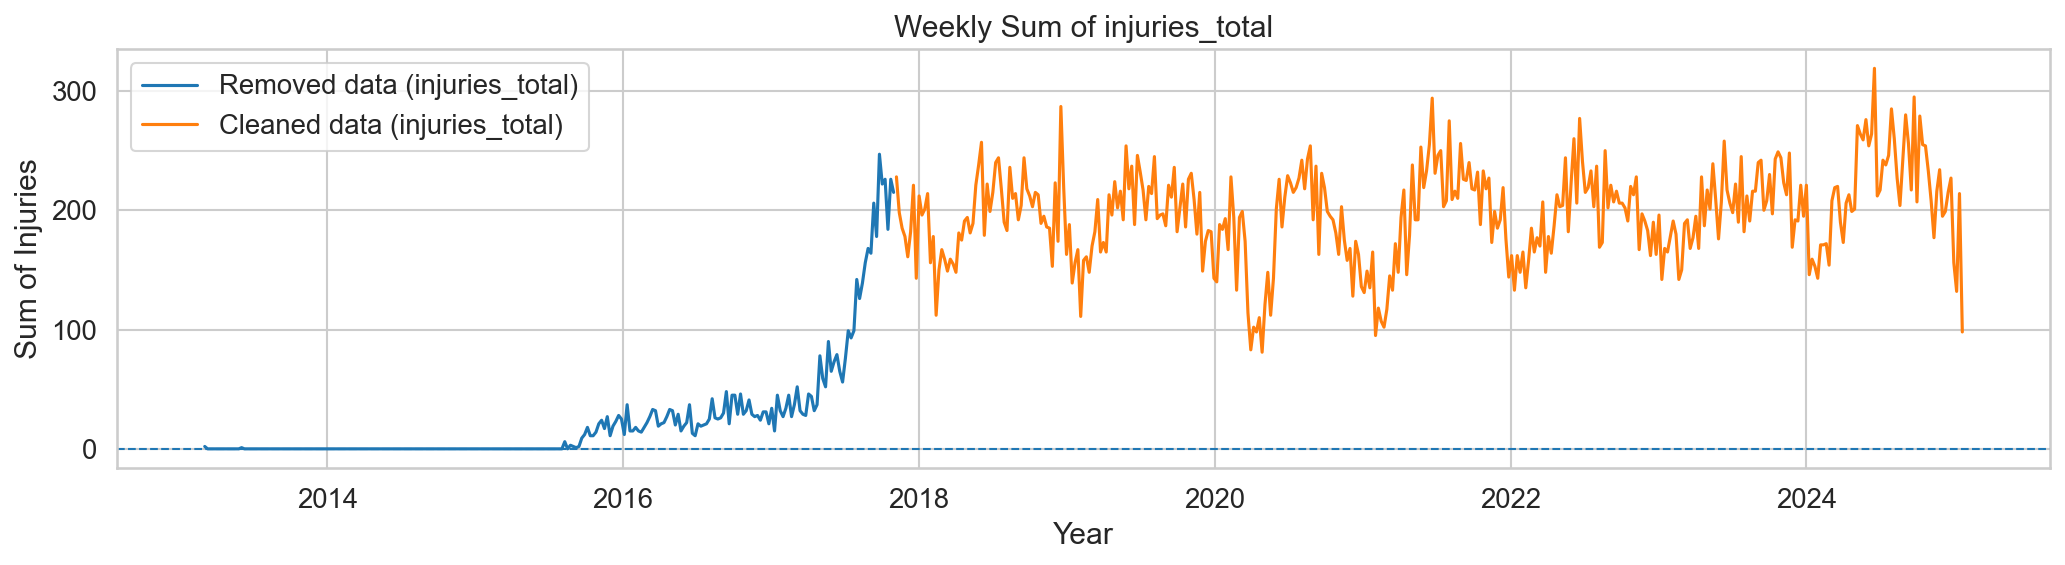

In [225]:
# Ensure datetime
df_plot = df_csv_data.copy()
df_plot["crash_date"] = pd.to_datetime(df_plot["crash_date"])
df_cleaned = df_csv_data_cleaned.copy()
df_cleaned["crash_date"] = pd.to_datetime(df_cleaned["crash_date"])

# Split removed data
df_removed = df_plot[df_plot["crash_date"] < "2017-11-01"]

# Concatenate for consistent weekly resampling
df_combined = pd.concat([df_removed, df_cleaned])

# Loop through injury columns
for col in col_names:
    if col not in df_plot.columns:
        print(f"Skipping {col}: column not found.")
        continue

    # Resample weekly over the full timeline
    weekly_sum = df_combined.set_index("crash_date")[col].resample("W-MON").sum()

    # Separate removed vs cleaned for plotting
    weekly_removed = weekly_sum.loc[weekly_sum.index < "2017-11-01"]
    weekly_cleaned = weekly_sum.loc[weekly_sum.index >= "2017-11-01"]

    # Plot
    plt.figure(figsize=(14, 4))
    plt.plot(weekly_removed.index, weekly_removed.values, label=f"Removed data ({col})")
    plt.plot(weekly_cleaned.index, weekly_cleaned.values, label=f"Cleaned data ({col})")
    plt.axhline(0, linestyle="--", linewidth=1)

    plt.title(f"Weekly Sum of {col}")
    plt.xlabel("Year")
    plt.ylabel("Sum of Injuries")
    plt.legend()
    plt.tight_layout()
    plt.show()


---
## B. Visualization and Exploratory Analysis (55 points)
---
**Assigned to Jeremia**
- Time-series visualizations (raw, smoothed, rolling mean or windowed views) (10 points)
- Distribution analysis with histograms and density style plots where applicable (10 points)
- Correlation analysis and heatmaps (Pearson and at least one alternative such as Spearman,
with short interpretation) (10 points)
- Daily or periodic pattern analysis (day-of-week, hour-of-day, seasonality indicators, or
test-cycle patterns) (15 points)
- Summary of observed patterns as short check statements (similar to True/False style)
with evidence (10 points)

---
## C. Probability and Event Analysis (45 points)
---
**Assigned to Tim**
- Threshold-based probability estimation for events (define event, justify threshold, compute
empirical probability) (15 points)
- Cross tabulation analysis for two variables (10 points)
- Conditional probability analysis (at least two meaningful conditional relationships) (15
points)
- Summary of observations and limitations (what could bias these estimates, what assump-
tions were made) (5 points)

---
## D. Statistical Theory Applications (45 points)
---
**Assigned to Tim**
- Law of Large Numbers demonstration (15 points)
- Central Limit Theorem application (sampling distributions, effect of sample size, interpretation) (25 points)
- Result interpretation and sanity checks (what would invalidate your conclusion, what you verified) (5 points)

---
## E. Regression and Predictive Modeling (45 points)
---
**Assigned to Lorenz**
- Define a prediction target and features (justify why they make sense) (10 points)
- Linear or polynomial model selection (include rationale and show at least two candidates)
(10 points)
- Model fitting and validation (train-test split appropriate for time-series. e.g., time-based split) (15 points)
- Residual analysis and interpretation (errors, bias, failure cases, what to improve next) (10 points)

In [226]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

create new feature for prediction: injuries_per_day

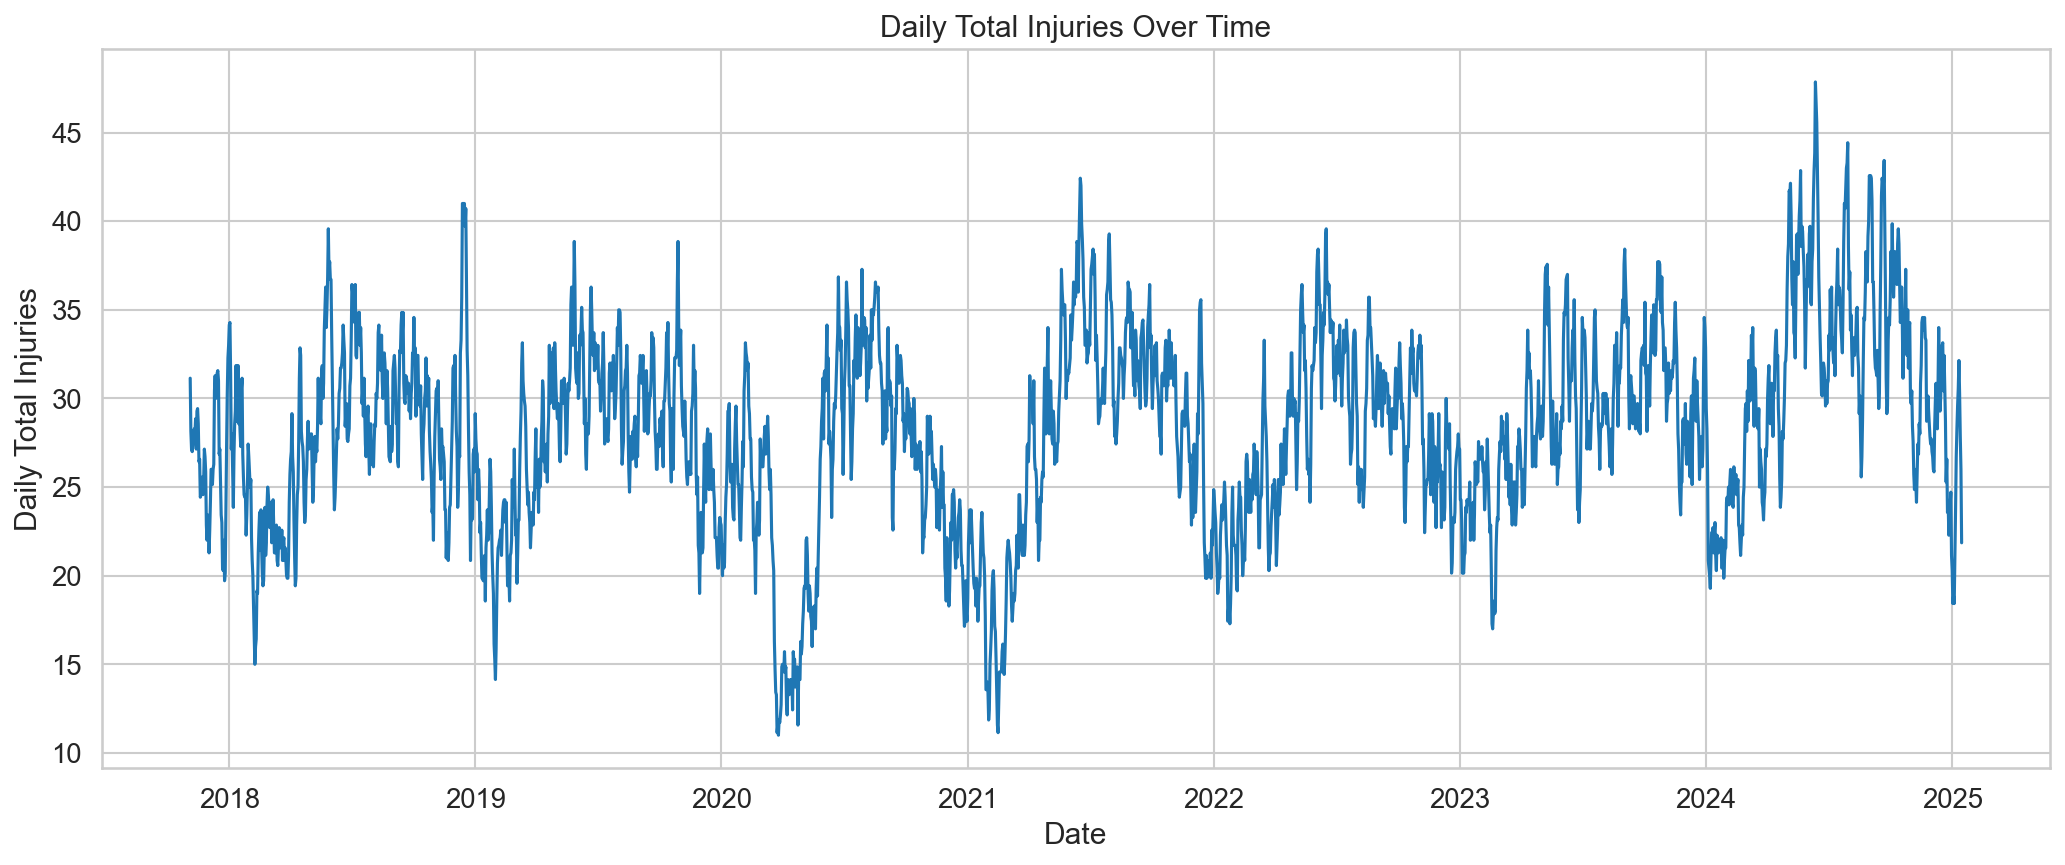

In [227]:
# Create a new dataframe with daily total injuries

df_daily_data = df_csv_data_cleaned.groupby(df_csv_data_cleaned['crash_date'].dt.date)['injuries_total'].sum().reset_index()

# apply a rolling mean with a window of 7 days
df_daily_data.columns = ['crash_date', 'injuries_total']
df_daily_data['injuries_total'] = df_daily_data['injuries_total'].rolling(window=7, center=True).mean()

# Remove all entries where there is a NaN value
df_daily_data = df_daily_data.dropna()

df_daily_data["crash_date"] = pd.to_datetime(df_daily_data["crash_date"])
df_daily_data["dayofweek"] = df_daily_data["crash_date"].dt.day_name()
df_daily_data["day_of_year"] = df_daily_data["crash_date"].dt.dayofyear
df_daily_data["quarter"] = df_daily_data["crash_date"].dt.quarter

plt.figure(figsize=(14, 6))
plt.plot(df_daily_data['crash_date'], df_daily_data['injuries_total'], linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Daily Total Injuries')
plt.title('Daily Total Injuries Over Time')
plt.tight_layout()
plt.show()

**Train-Test Split**

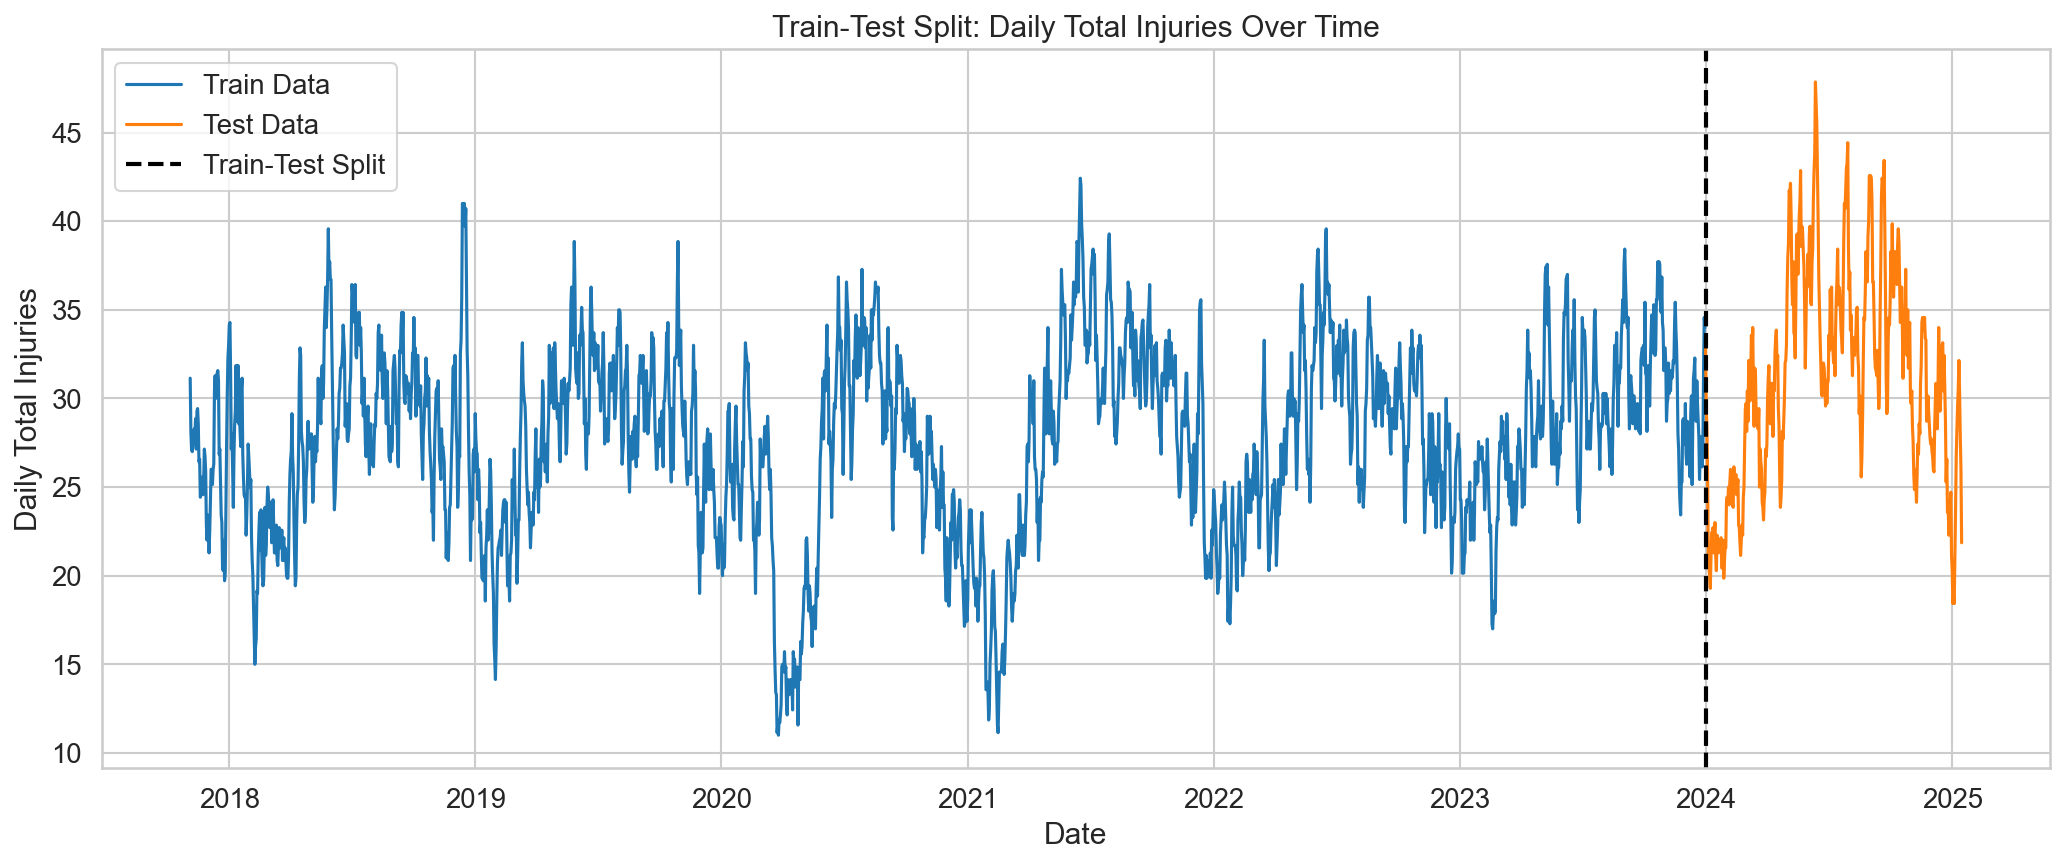

In [228]:
df_daily_data["crash_date"] = pd.to_datetime(df_daily_data["crash_date"])

train = df_daily_data[df_daily_data["crash_date"] < "2024-01-01"]
test = df_daily_data[df_daily_data["crash_date"] >= "2024-01-01"]

# Visualization: Train and test data on a timeline
plt.figure(figsize=(14, 6))

# Plot train data
plt.plot(train["crash_date"], train["injuries_total"], label="Train Data", linewidth=1.5)

# Plot test data
plt.plot(test["crash_date"], test["injuries_total"], label="Test Data", linewidth=1.5)

# Add vertical line at split point
split_date = pd.to_datetime("2024-01-01")
plt.axvline(x=split_date, color="black", linestyle="--", linewidth=2, label="Train-Test Split")

plt.xlabel("Date")
plt.ylabel("Daily Total Injuries")
plt.title("Train-Test Split: Daily Total Injuries Over Time")
plt.legend()
plt.tight_layout()
plt.show()

Create Model with Improved Features

In [229]:
from sklearn.preprocessing import LabelEncoder

# Use calendar features with day_of_year for smooth seasonal trends (no month steps)
df_daily_data_clean = df_daily_data.copy()

# Recreate train/test split
train = df_daily_data_clean[df_daily_data_clean["crash_date"] < "2024-01-01"]
test = df_daily_data_clean[df_daily_data_clean["crash_date"] >= "2024-01-01"]

FEATURES = ["dayofweek", "day_of_year", "quarter"]
TARGET = "injuries_total"

# Encode dayofweek to numeric
le = LabelEncoder()
X_train = train[FEATURES].copy()
X_train["dayofweek"] = le.fit_transform(X_train["dayofweek"])

X_test = test[FEATURES].copy()
X_test["dayofweek"] = le.transform(X_test["dayofweek"])

y_train = train[TARGET]
y_test = test[TARGET]

reg = xgb.XGBRegressor(
    n_estimators = 100,
    early_stopping_rounds = 15,
    learning_rate = 0.1,
    max_depth = 3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_lambda = 2.0,
    reg_alpha = 0.5
)

reg.fit(
    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True
)

[0]	validation_0-rmse:5.00406	validation_1-rmse:6.88784
[1]	validation_0-rmse:4.82446	validation_1-rmse:6.71721
[2]	validation_0-rmse:4.67375	validation_1-rmse:6.57453
[3]	validation_0-rmse:4.54386	validation_1-rmse:6.45422
[4]	validation_0-rmse:4.46639	validation_1-rmse:6.37351
[5]	validation_0-rmse:4.36976	validation_1-rmse:6.27235
[6]	validation_0-rmse:4.29037	validation_1-rmse:6.19550
[7]	validation_0-rmse:4.22149	validation_1-rmse:6.11507
[8]	validation_0-rmse:4.16681	validation_1-rmse:6.05551
[9]	validation_0-rmse:4.13610	validation_1-rmse:6.00892
[10]	validation_0-rmse:4.09587	validation_1-rmse:5.95662
[11]	validation_0-rmse:4.06101	validation_1-rmse:5.91224
[12]	validation_0-rmse:4.03141	validation_1-rmse:5.87601
[13]	validation_0-rmse:4.00532	validation_1-rmse:5.84837
[14]	validation_0-rmse:3.98630	validation_1-rmse:5.82418
[15]	validation_0-rmse:3.97608	validation_1-rmse:5.79801
[16]	validation_0-rmse:3.96665	validation_1-rmse:5.77869
[17]	validation_0-rmse:3.94835	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=15,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

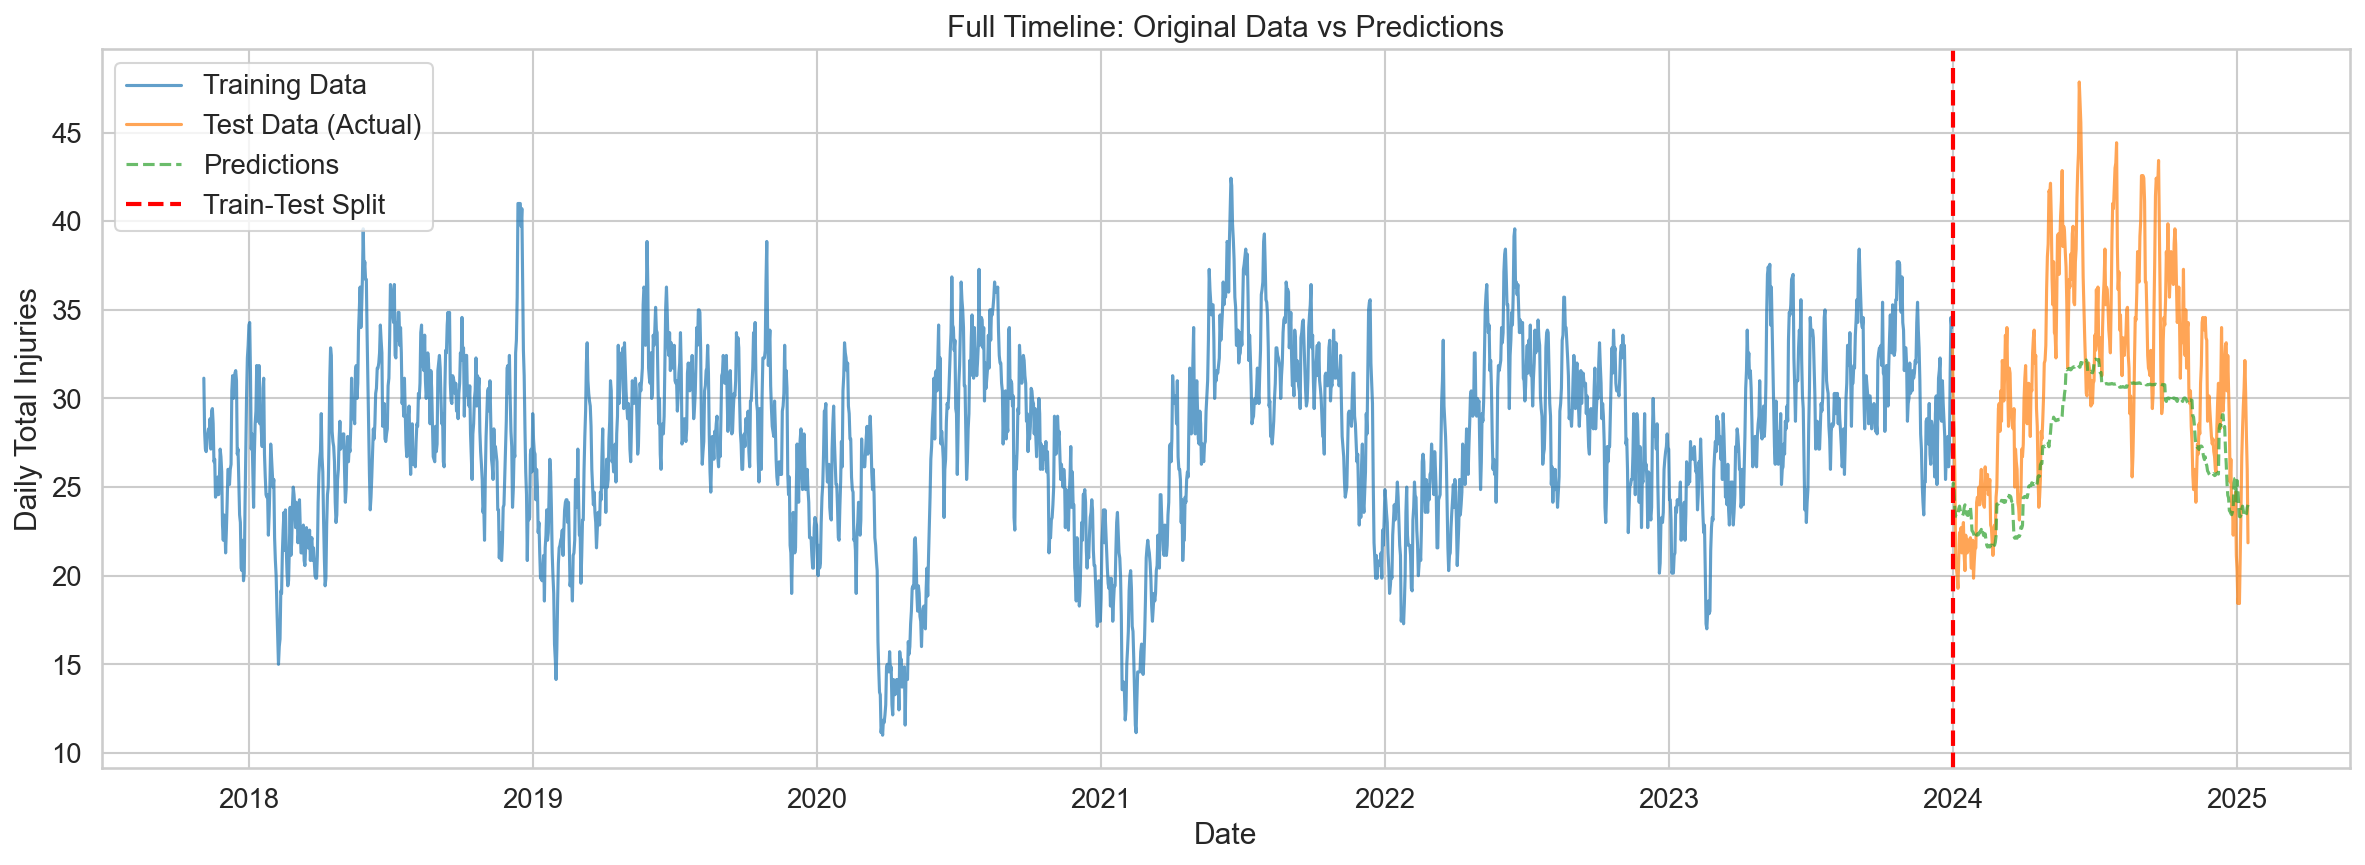

In [230]:
# Only create predictions for test data
test_with_pred = test.copy()
test_with_pred["prediction"] = reg.predict(X_test)

# Plot full timeline
plt.figure(figsize=(16, 6))
plt.plot(train["crash_date"], train["injuries_total"], label='Training Data', linewidth=1.5, alpha=0.7)
plt.plot(test["crash_date"], test["injuries_total"], label='Test Data (Actual)', linewidth=1.5, alpha=0.7)
plt.plot(test_with_pred["crash_date"], test_with_pred["prediction"], label='Predictions', linewidth=1.5, linestyle='--', alpha=0.7)

# Add vertical line at train-test split
split_date = pd.to_datetime("2024-01-01")
plt.axvline(x=split_date, color="red", linestyle="--", linewidth=2, label="Train-Test Split")

plt.xlabel('Date')
plt.ylabel('Daily Total Injuries')
plt.title('Full Timeline: Original Data vs Predictions')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_17680\1786656307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = reg.predict(X_test)


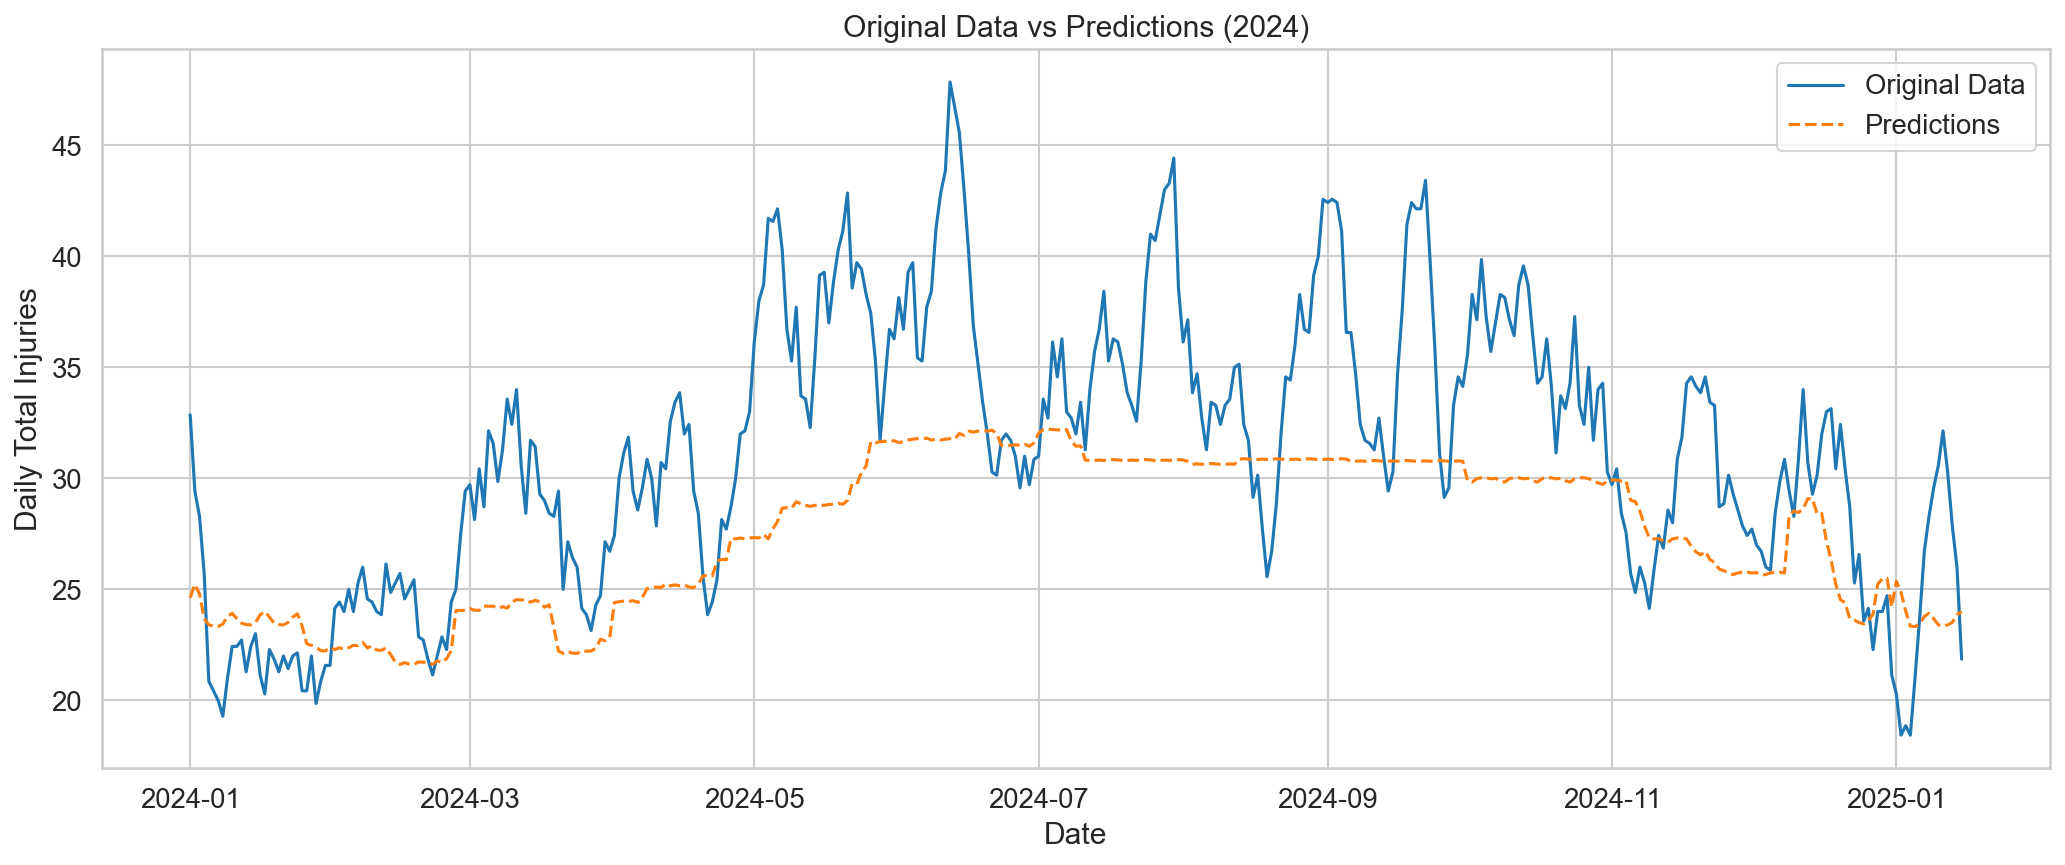

In [231]:
test["prediction"] = reg.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(test["crash_date"], test["injuries_total"], label='Original Data', linewidth=1.5)
plt.plot(test["crash_date"], test["prediction"], label='Predictions', linewidth=1.5, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Total Injuries')
plt.title('Original Data vs Predictions (2024)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation metrics (test set) ---
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare arrays
y_true = test["injuries_total"].values
y_pred = test["prediction"].values

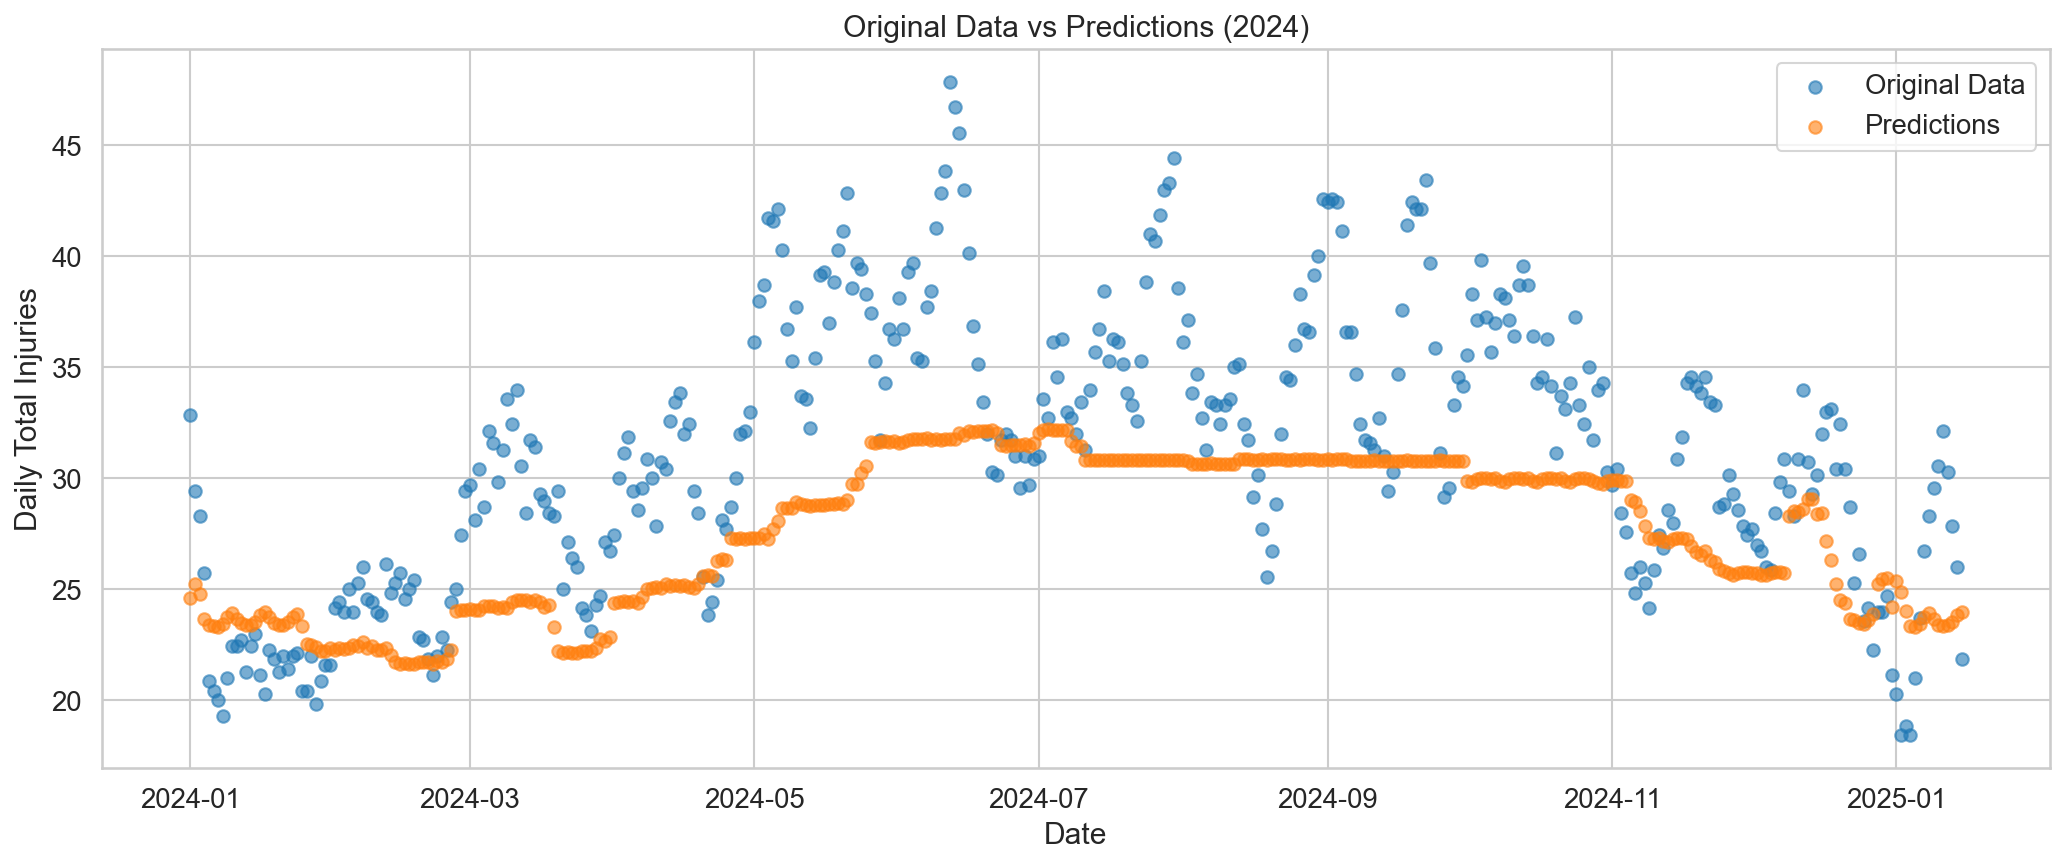

In [232]:
plt.figure(figsize=(14, 6))
plt.scatter(test["crash_date"], test["injuries_total"], label='Original Data', alpha=0.6)
plt.scatter(test["crash_date"], test["prediction"], label='Predictions', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Daily Total Injuries')
plt.title('Original Data vs Predictions (2024)')
plt.legend()
plt.tight_layout()
plt.show()

Test RMSE: 5.662
Test MAE:  4.533
Test R^2:  0.131
Test MAPE: 13.57%



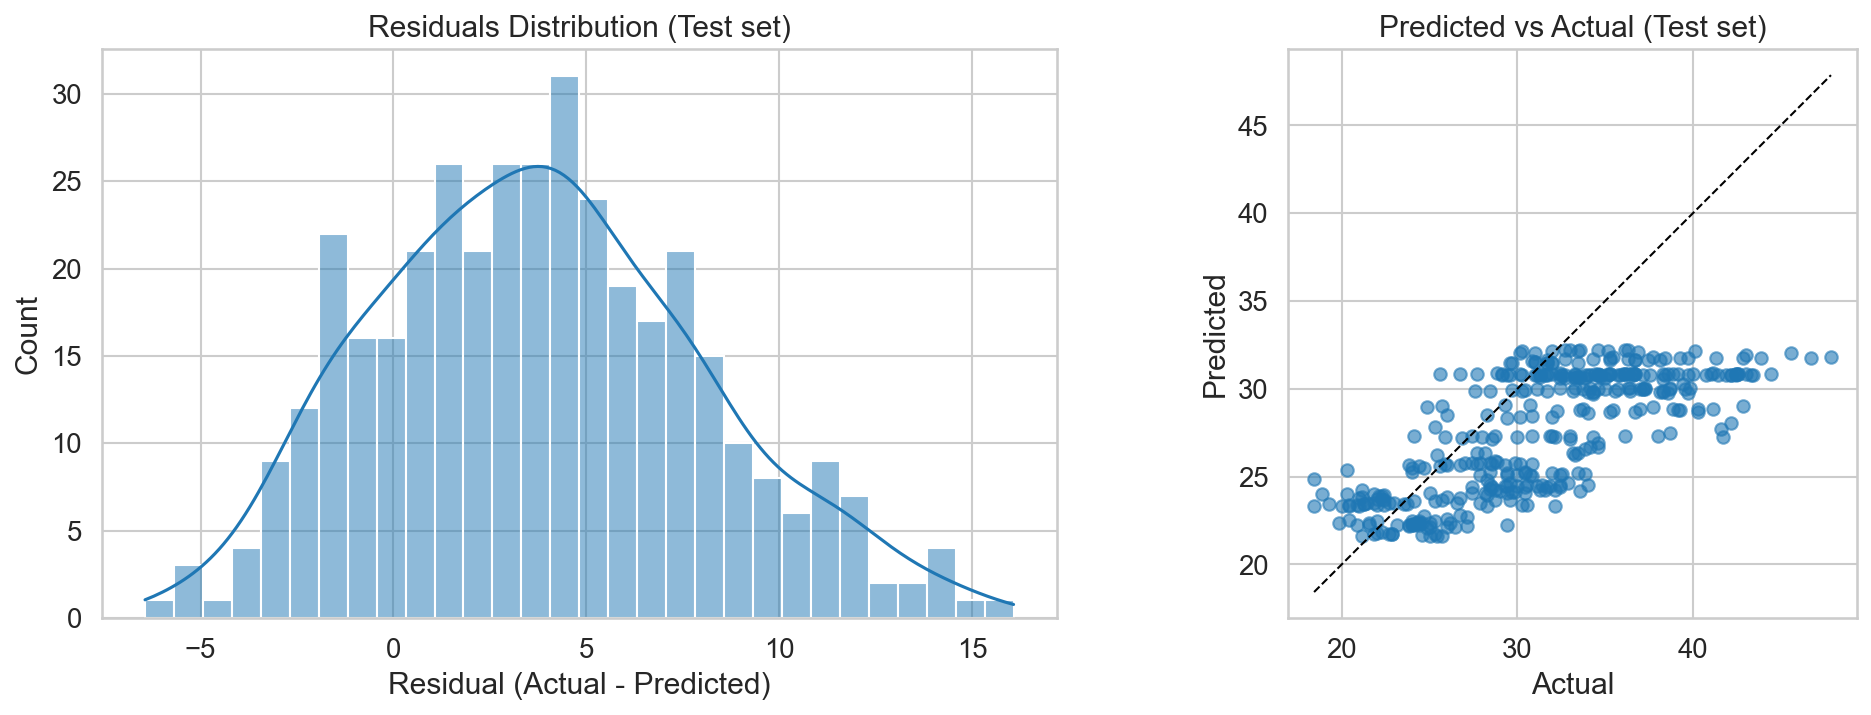

In [233]:
# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
# Handle zeros for MAPE
nonzero_mask = y_true != 0
mape = (np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask]).mean() * 100) if nonzero_mask.any() else np.nan

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")
print(f"Test R^2:  {r2:.3f}")
print(f"Test MAPE: {mape:.2f}%\n")

# Residuals distribution
residuals = y_true - y_pred
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Residuals histogram
sns.histplot(residuals, kde=True, bins=30, ax=axes[0])
axes[0].set_title('Residuals Distribution (Test set)')
axes[0].set_xlabel('Residual (Actual - Predicted)')

# Right plot: Predicted vs Actual scatter
axes[1].scatter(y_true, y_pred, alpha=0.6)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
axes[1].plot(lims, lims, 'k--', linewidth=1)
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Predicted vs Actual (Test set)')
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

The model was able to roughly predict the values. There are visible plateaus in the predicted data. The reason for that is that not enough features were supplied to the model.  

The predicted values are usually also smaller than the actual values. The reason for this is that in the year of 2024 more injuries occured than in the previos years the model was trained on.  

Possible improvements are that more features should be used to discribe the fluctuations. Also the input data could be pre-processed better. For example outliers could be removed.

---
## F. Dimensionality Reduction and Statistical Tests (40 points)
---
**Assigned to Jeremia**
### Part 1. Dimensionality Reduction (25 points)
- PCA projection and interpretation (variance explained, what clusters or separations mean) (10 points)
- t-SNE embedding with justified hyperparameters (perplexity or similar) and interpretation (7 points)
- UMAP embedding with justified hyperparameters (neighbors, min dist or similar) and interpretation (8 points)
### Part 2. Hypothesis Tests (15 points)
Perform at least three tests. Each test must include: null hypothesis, why the test is appropriate, assumptions, p-value, and practical interpretation.
- Chi-square test (choose one):
    - Chi-square test of independence (use a contingency table from two categorical or binned variables), or
    - Chi-square goodness-of-fit (compare observed counts to an expected distribution you justify). (5 points)
- One mean or location comparison test (choose one): t-test, Welch t-test, Mann-Whitney U, or ANOVA (5 points)
- One time-series relevant test (choose one): stationarity test (ADF or KPSS), Ljung-Box for autocorrelation, or change-point style test if justified (5 points)